# 02 - trajectory inference using PAGA

In [1]:
%matplotlib inline

import warnings
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import rcParams

warnings.filterwarnings("ignore")

sc.settings.set_figure_params(dpi_save=300, vector_friendly=False)
sc.settings.verbosity = 3

random_seed = 12345


def run_paga(adata, by="CellType"):
    sc.tl.paga(adata, groups=by)
    sc.pl.paga(adata, color=[by])
    sc.pl.paga(adata, threshold=0.1, show=False)
    sc.tl.draw_graph(adata, init_pos="paga")
    sc.pl.draw_graph(adata, color=by)

    return adata

In [2]:
adata = sc.read("../data/processed/01_raw_counts.h5ad")
metadata = pd.read_csv("../data/processed/02_metadata.csv", index_col=0)

adata = adata[metadata.index].copy()
adata.obs = metadata

# adata.obs.Batch = adata.obs.Batch.astype('category')

In [3]:
sc.pp.normalize_total(adata, target_sum=10_000)
sc.pp.log1p(adata)

adata.raw = adata

Normalizing counts per cell.
    finished (0:00:00):normalized adata.X


In [4]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2_000)
adata = adata[:, adata.var.highly_variable]

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [5]:
batches = [adata[adata.obs.Batch == batch] for batch in adata.obs.Batch.unique()]

In [6]:
corrected = sce.pp.mnn_correct(*batches, batch_categories=adata.obs.Batch.unique())

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 7: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 7: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 7: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 7: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 7: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 6 of 7: processing batch 6
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 7 of 7: processing batch 7
  Looking for MNNs...
  Computing correction vectors...
  Ad

In [7]:
adata = corrected[0]

In [8]:
sc.tl.pca(adata, n_comps=20, svd_solver="arpack")

computing PCA with n_comps = 20
computing PCA on highly variable genes
    finished (0:00:00)


In [9]:
sc.pp.neighbors(adata, random_state=random_seed)
sc.tl.umap(adata, random_state=random_seed)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


... storing 'Amp_batch_ID' as categorical
... storing 'Batch' as categorical
... storing 'Cell_barcode' as categorical
... storing 'Condition' as categorical
... storing 'Day' as categorical
... storing 'Phase' as categorical
... storing 'Pool_barcode' as categorical
... storing 'SampleName' as categorical
... storing 'Source' as categorical
... storing 'Stage' as categorical
... storing 'SubGroup' as categorical
... storing 'Well_coordinates' as categorical
... storing 'cluster_names' as categorical
... storing 'orig.ident' as categorical


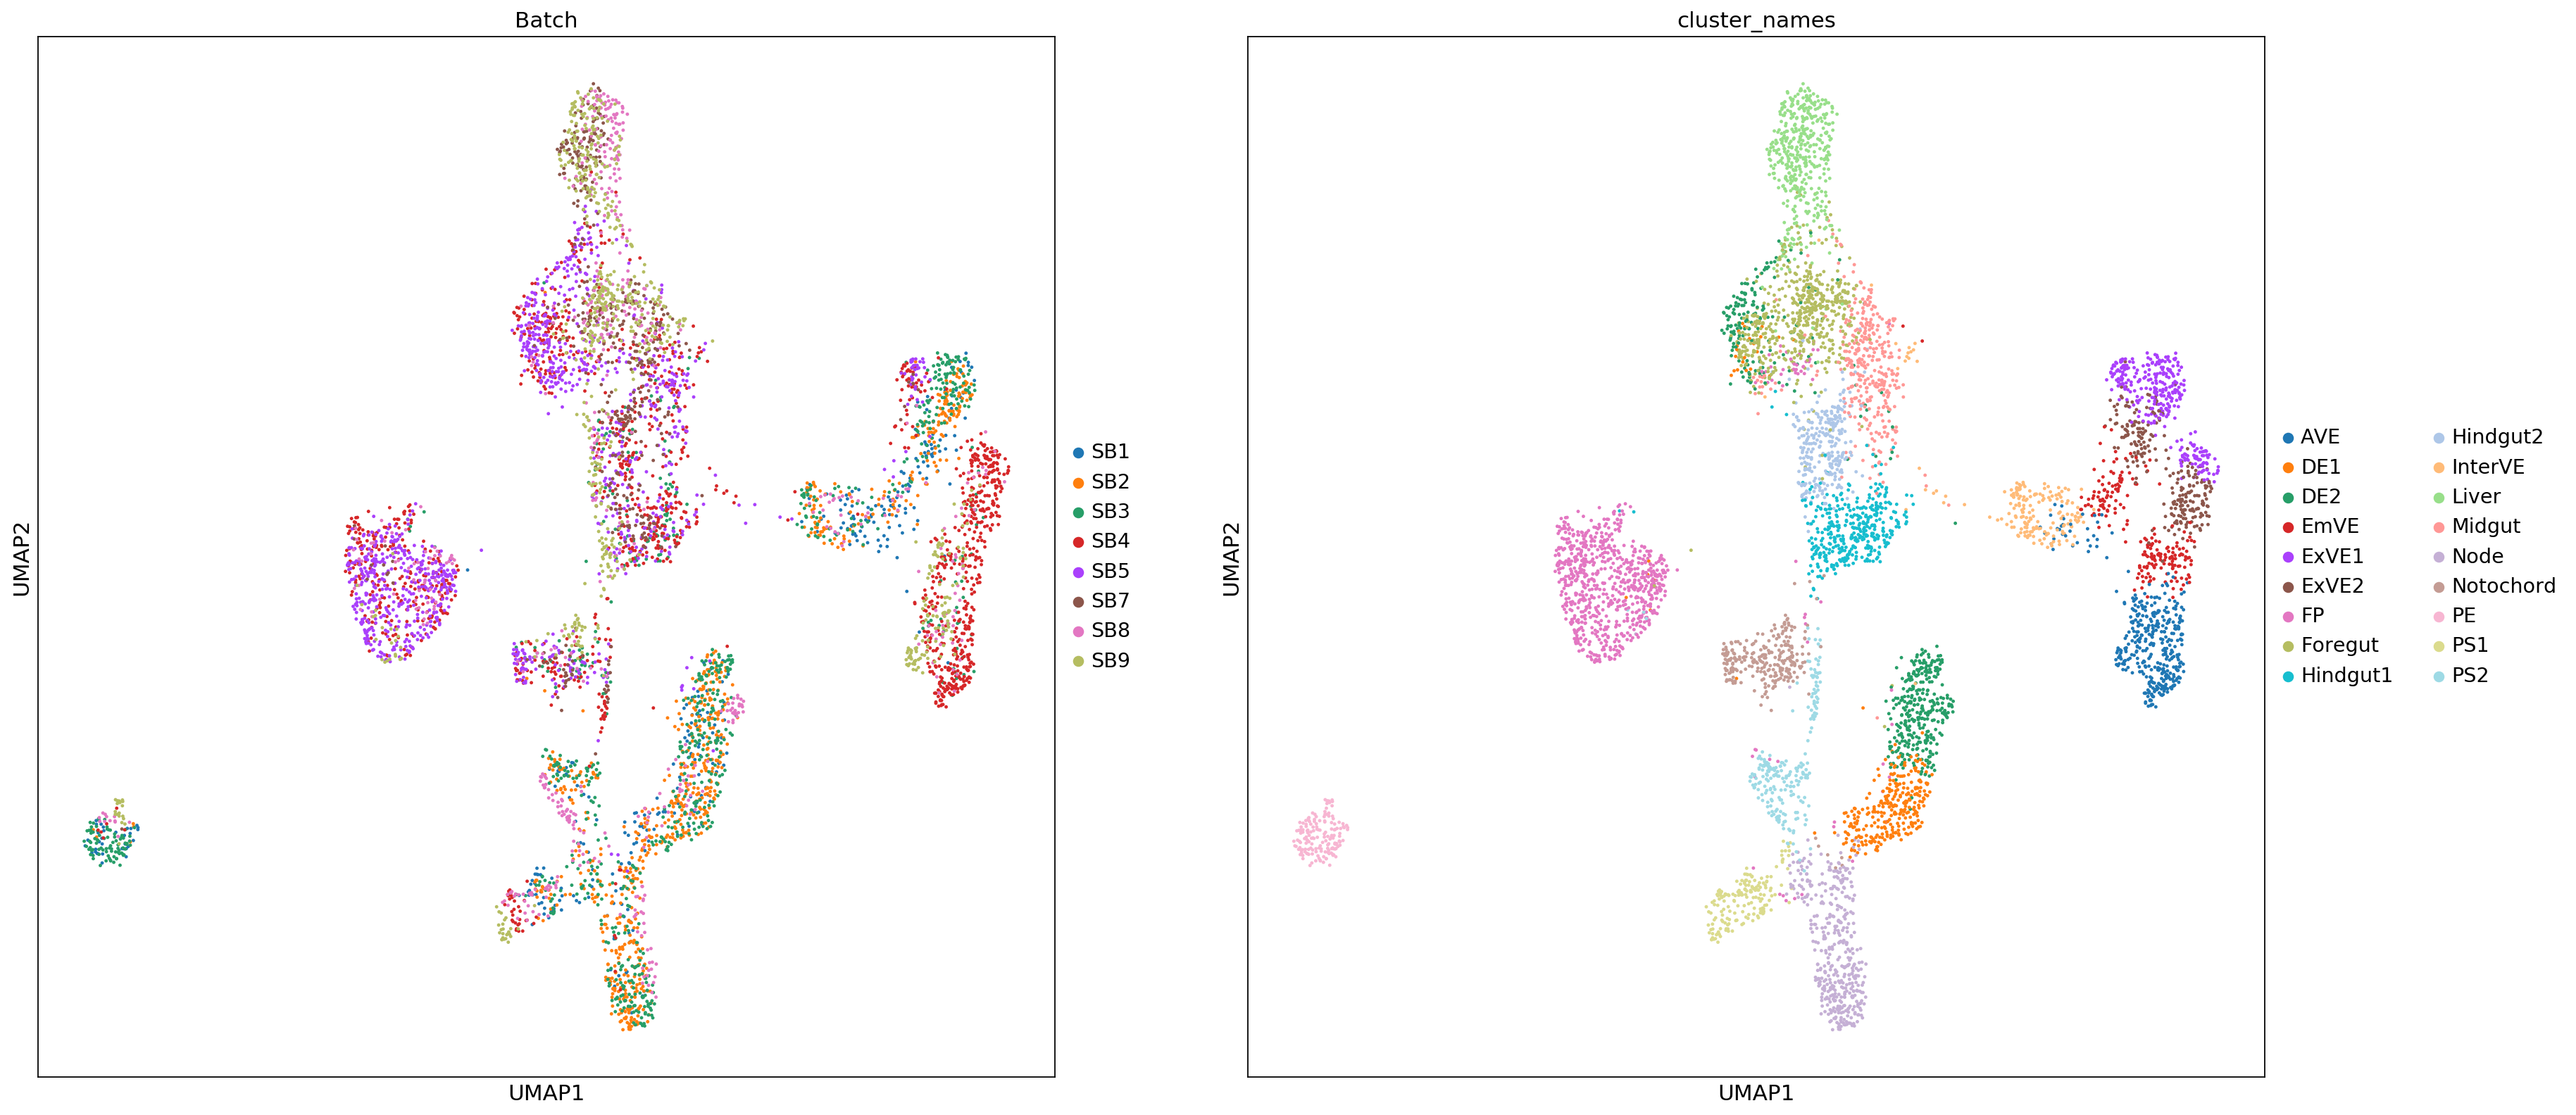

In [10]:
rcParams["figure.figsize"] = 12, 12
sc.pl.umap(adata, color=["Batch", "cluster_names"])

In [11]:
adata.write("../data/processed/02_paga.h5ad")

## PAGA

In [12]:
# adata = sc.read("../data/processed/02_paga.h5ad")

In [13]:
adata = adata[adata.obs.cluster_names != "PE"]

In [14]:
adata.uns["cluster_names_colors_old"] = adata.uns["cluster_names_colors"]
adata.uns["cluster_names_colors"] = [
    "#3f9a24",
    "#ebb8ff",
    "#9fbc2d",
    "#ce6f0b",
    "#7da2ff",
    "#ac4ebf",
    "#003d92",
    "#ff8d4c",
    "#bd006d",
    "#ff6cc8",
    "#fa6151",
    "#7067df",
    "#dfd86e",
    "#890033",
    "#00b46e",
    "#4a004b",
    "#97e876",
]

Trying to set attribute `.uns` of view, copying.


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


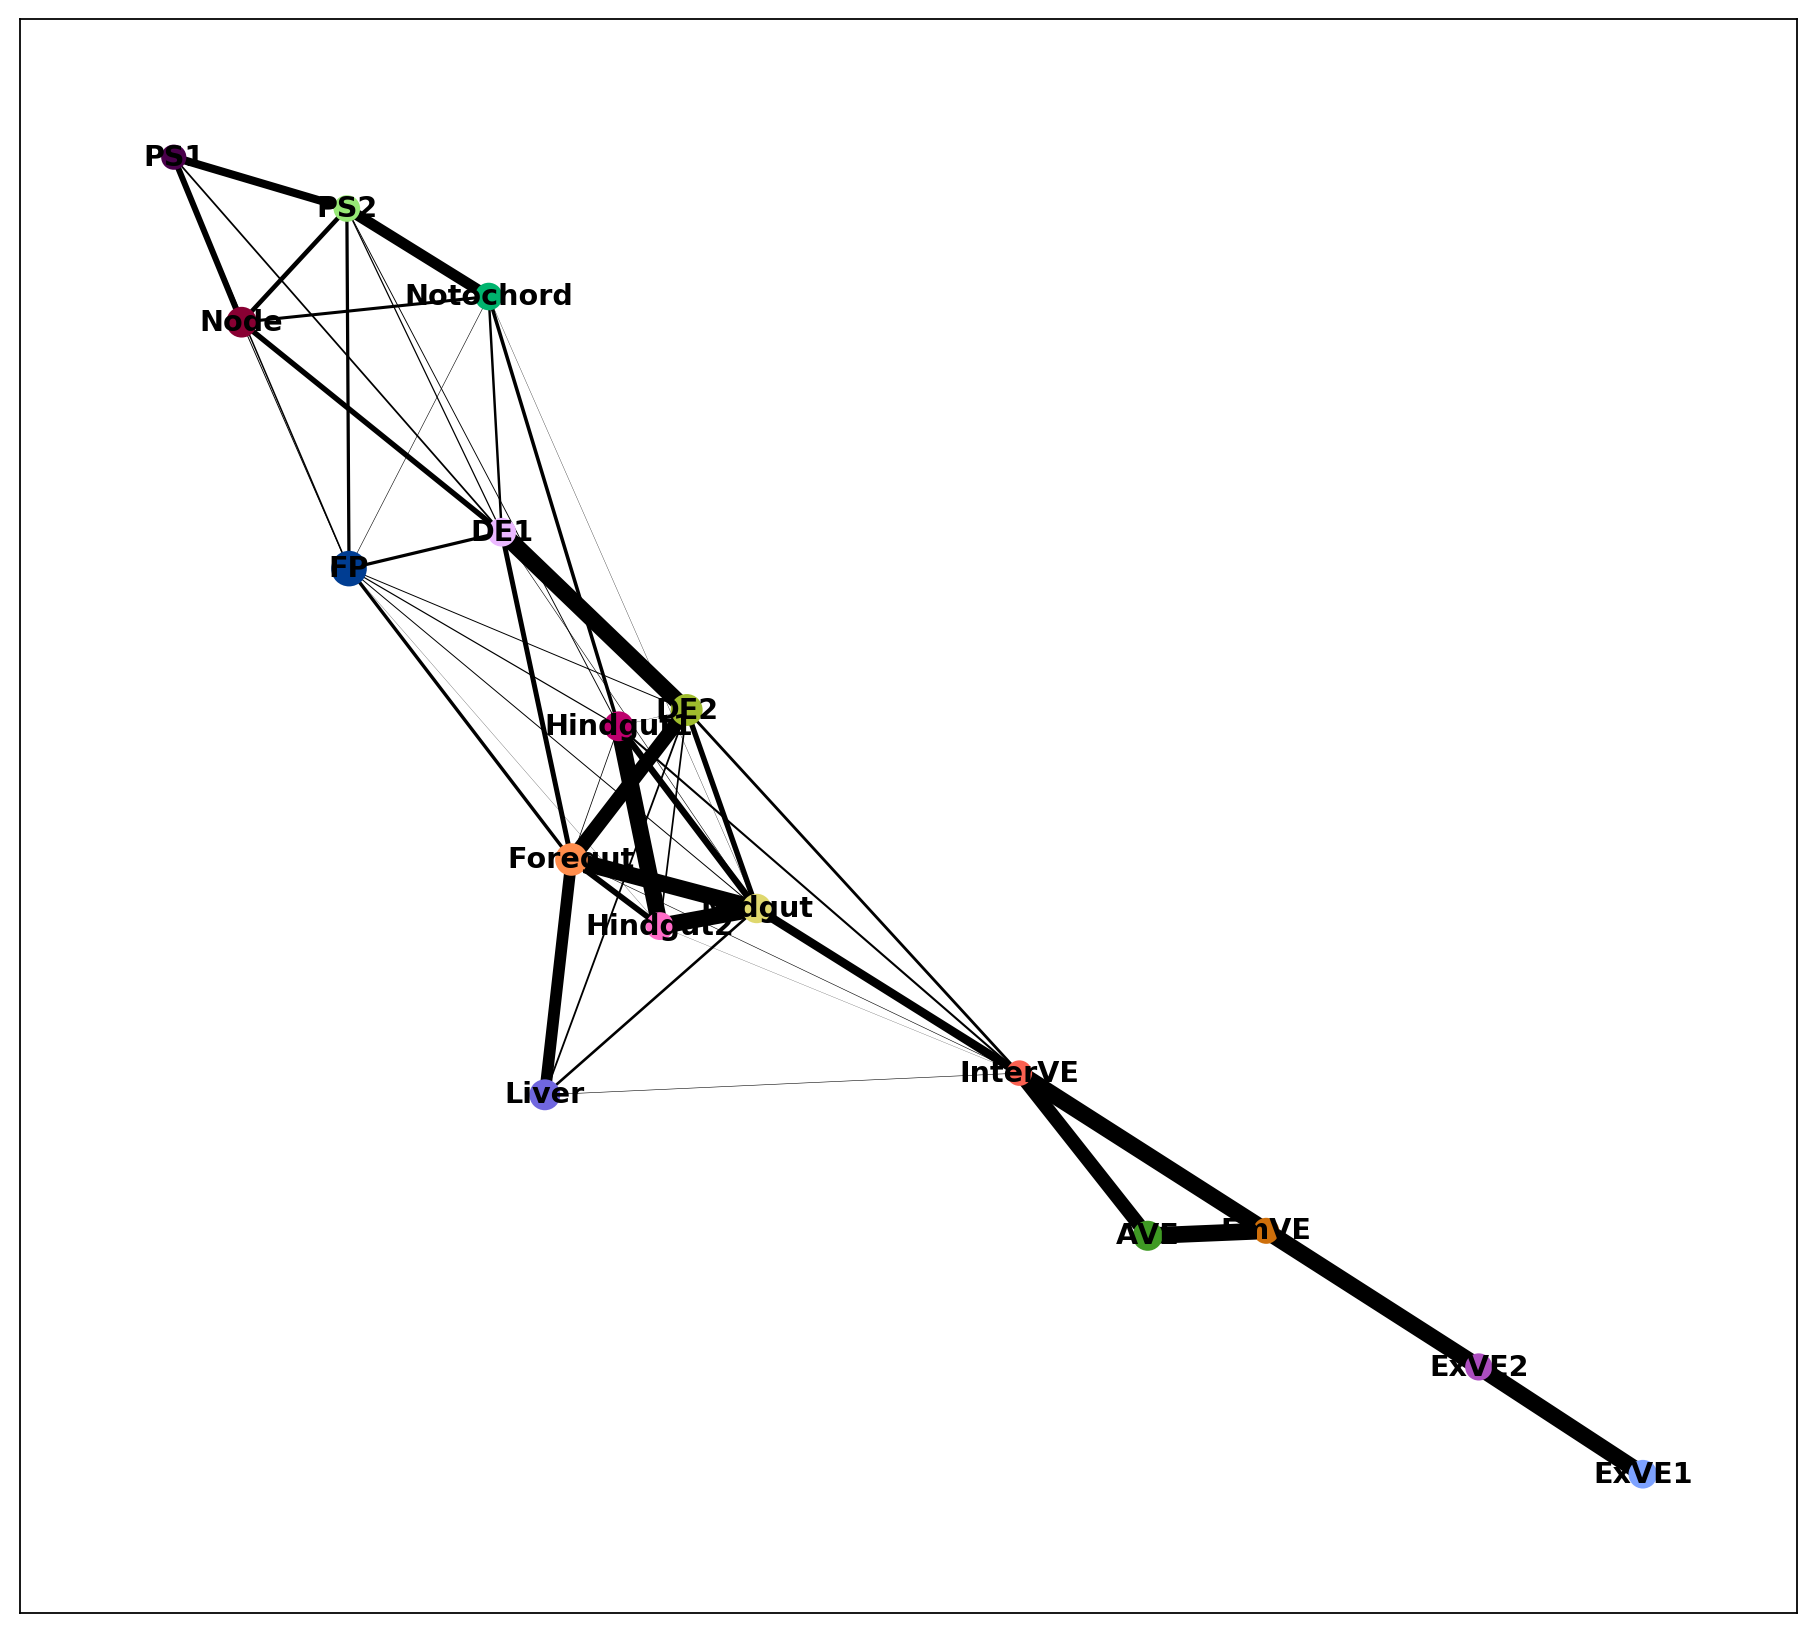

--> added 'pos', the PAGA positions (adata.uns['paga'])
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:55)


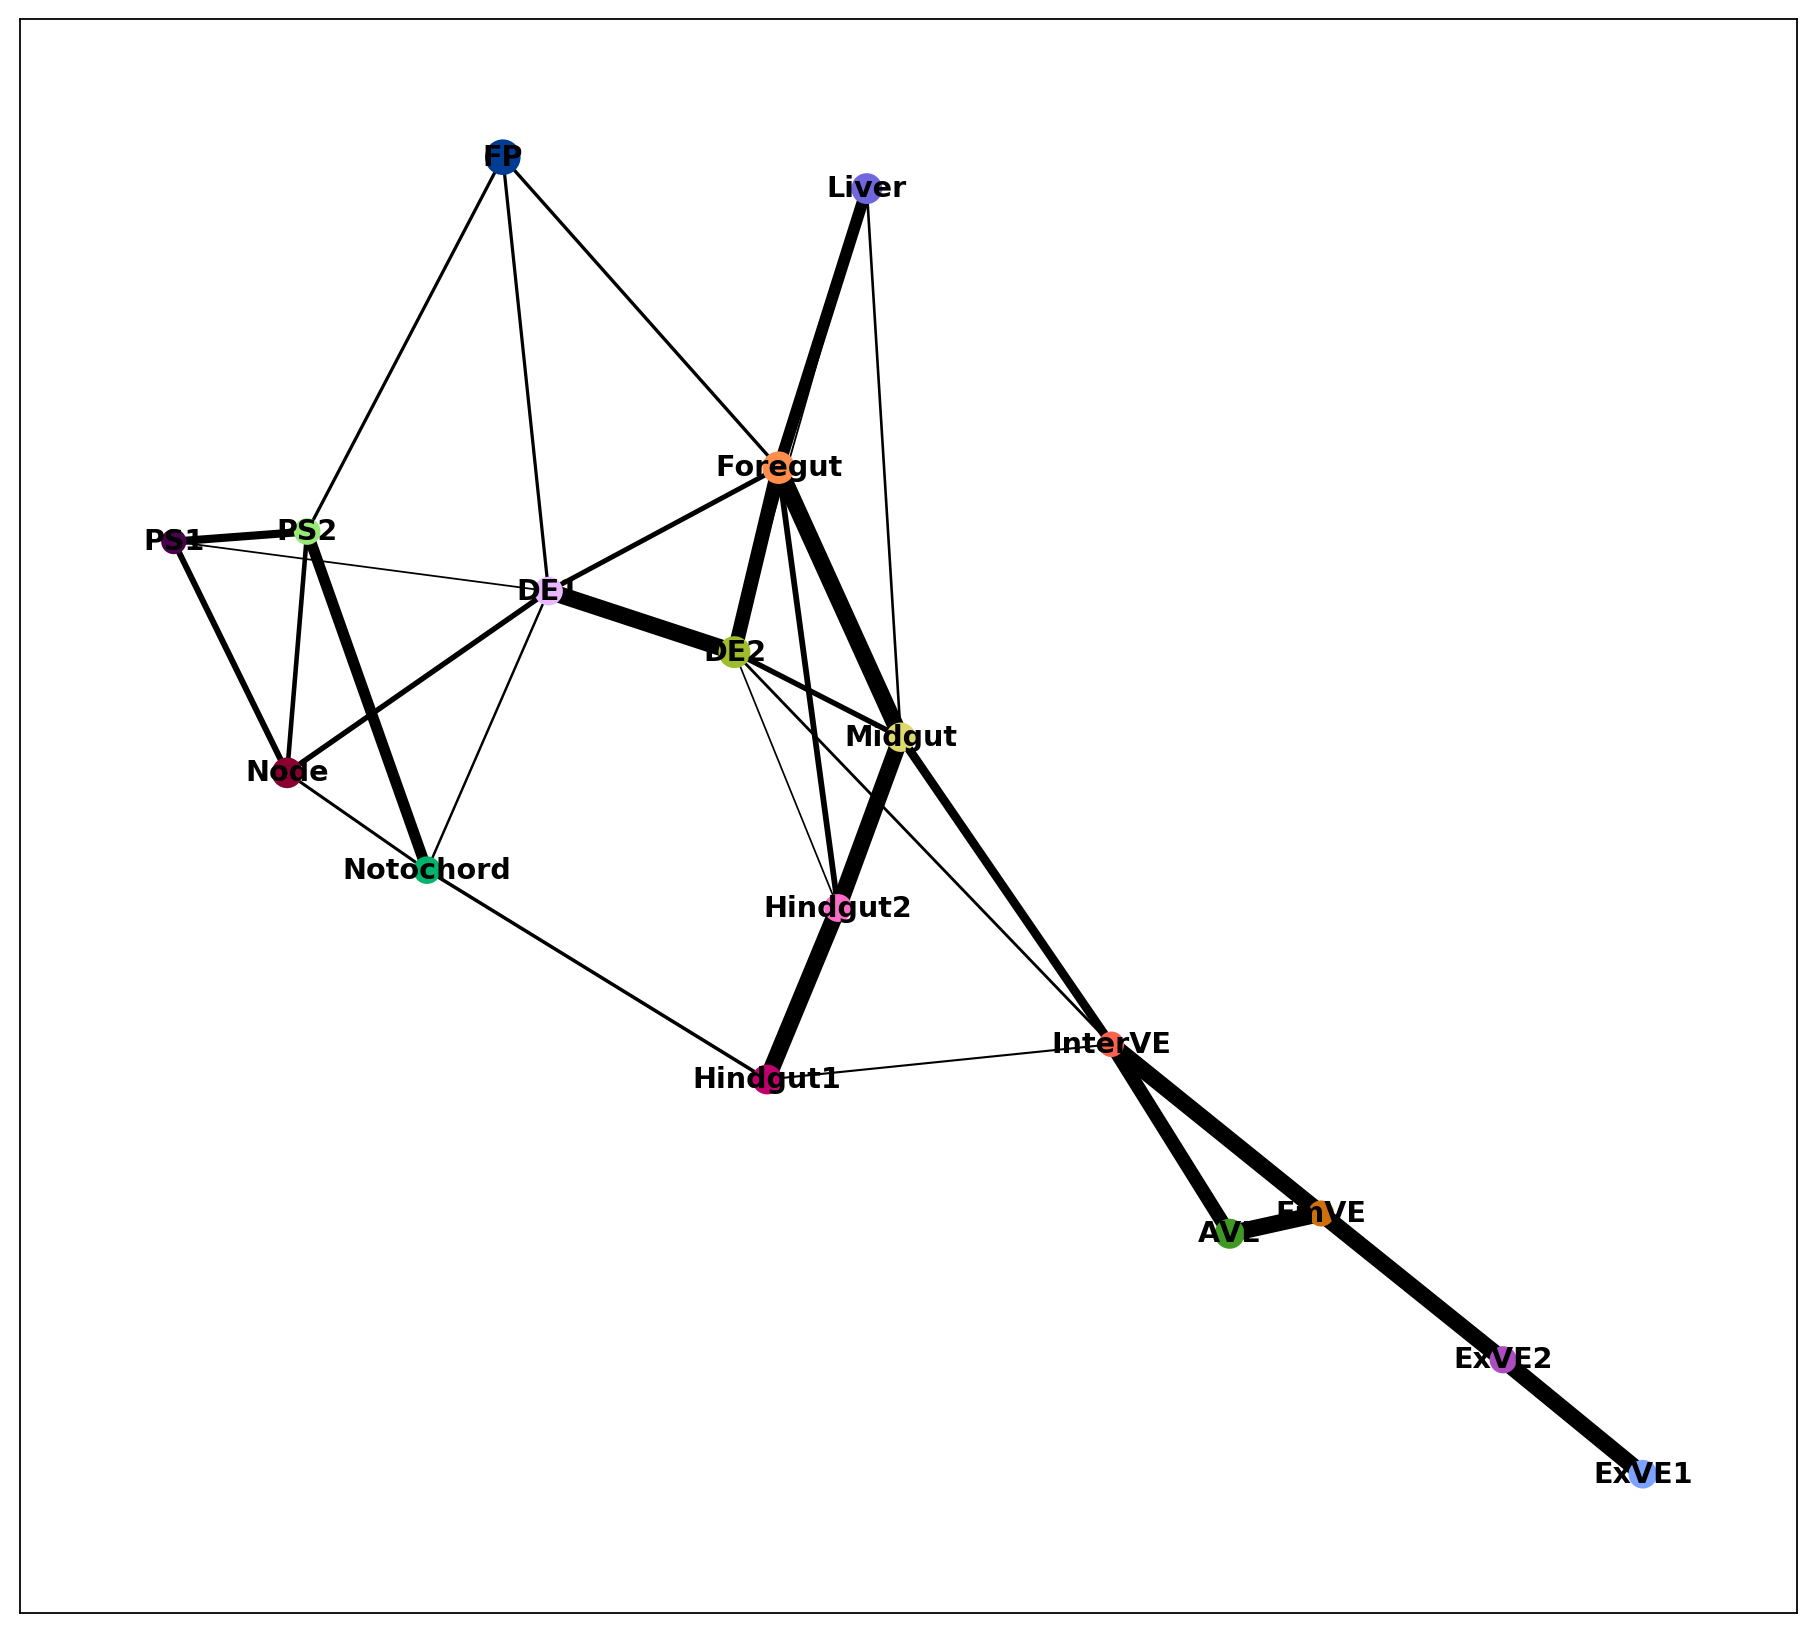

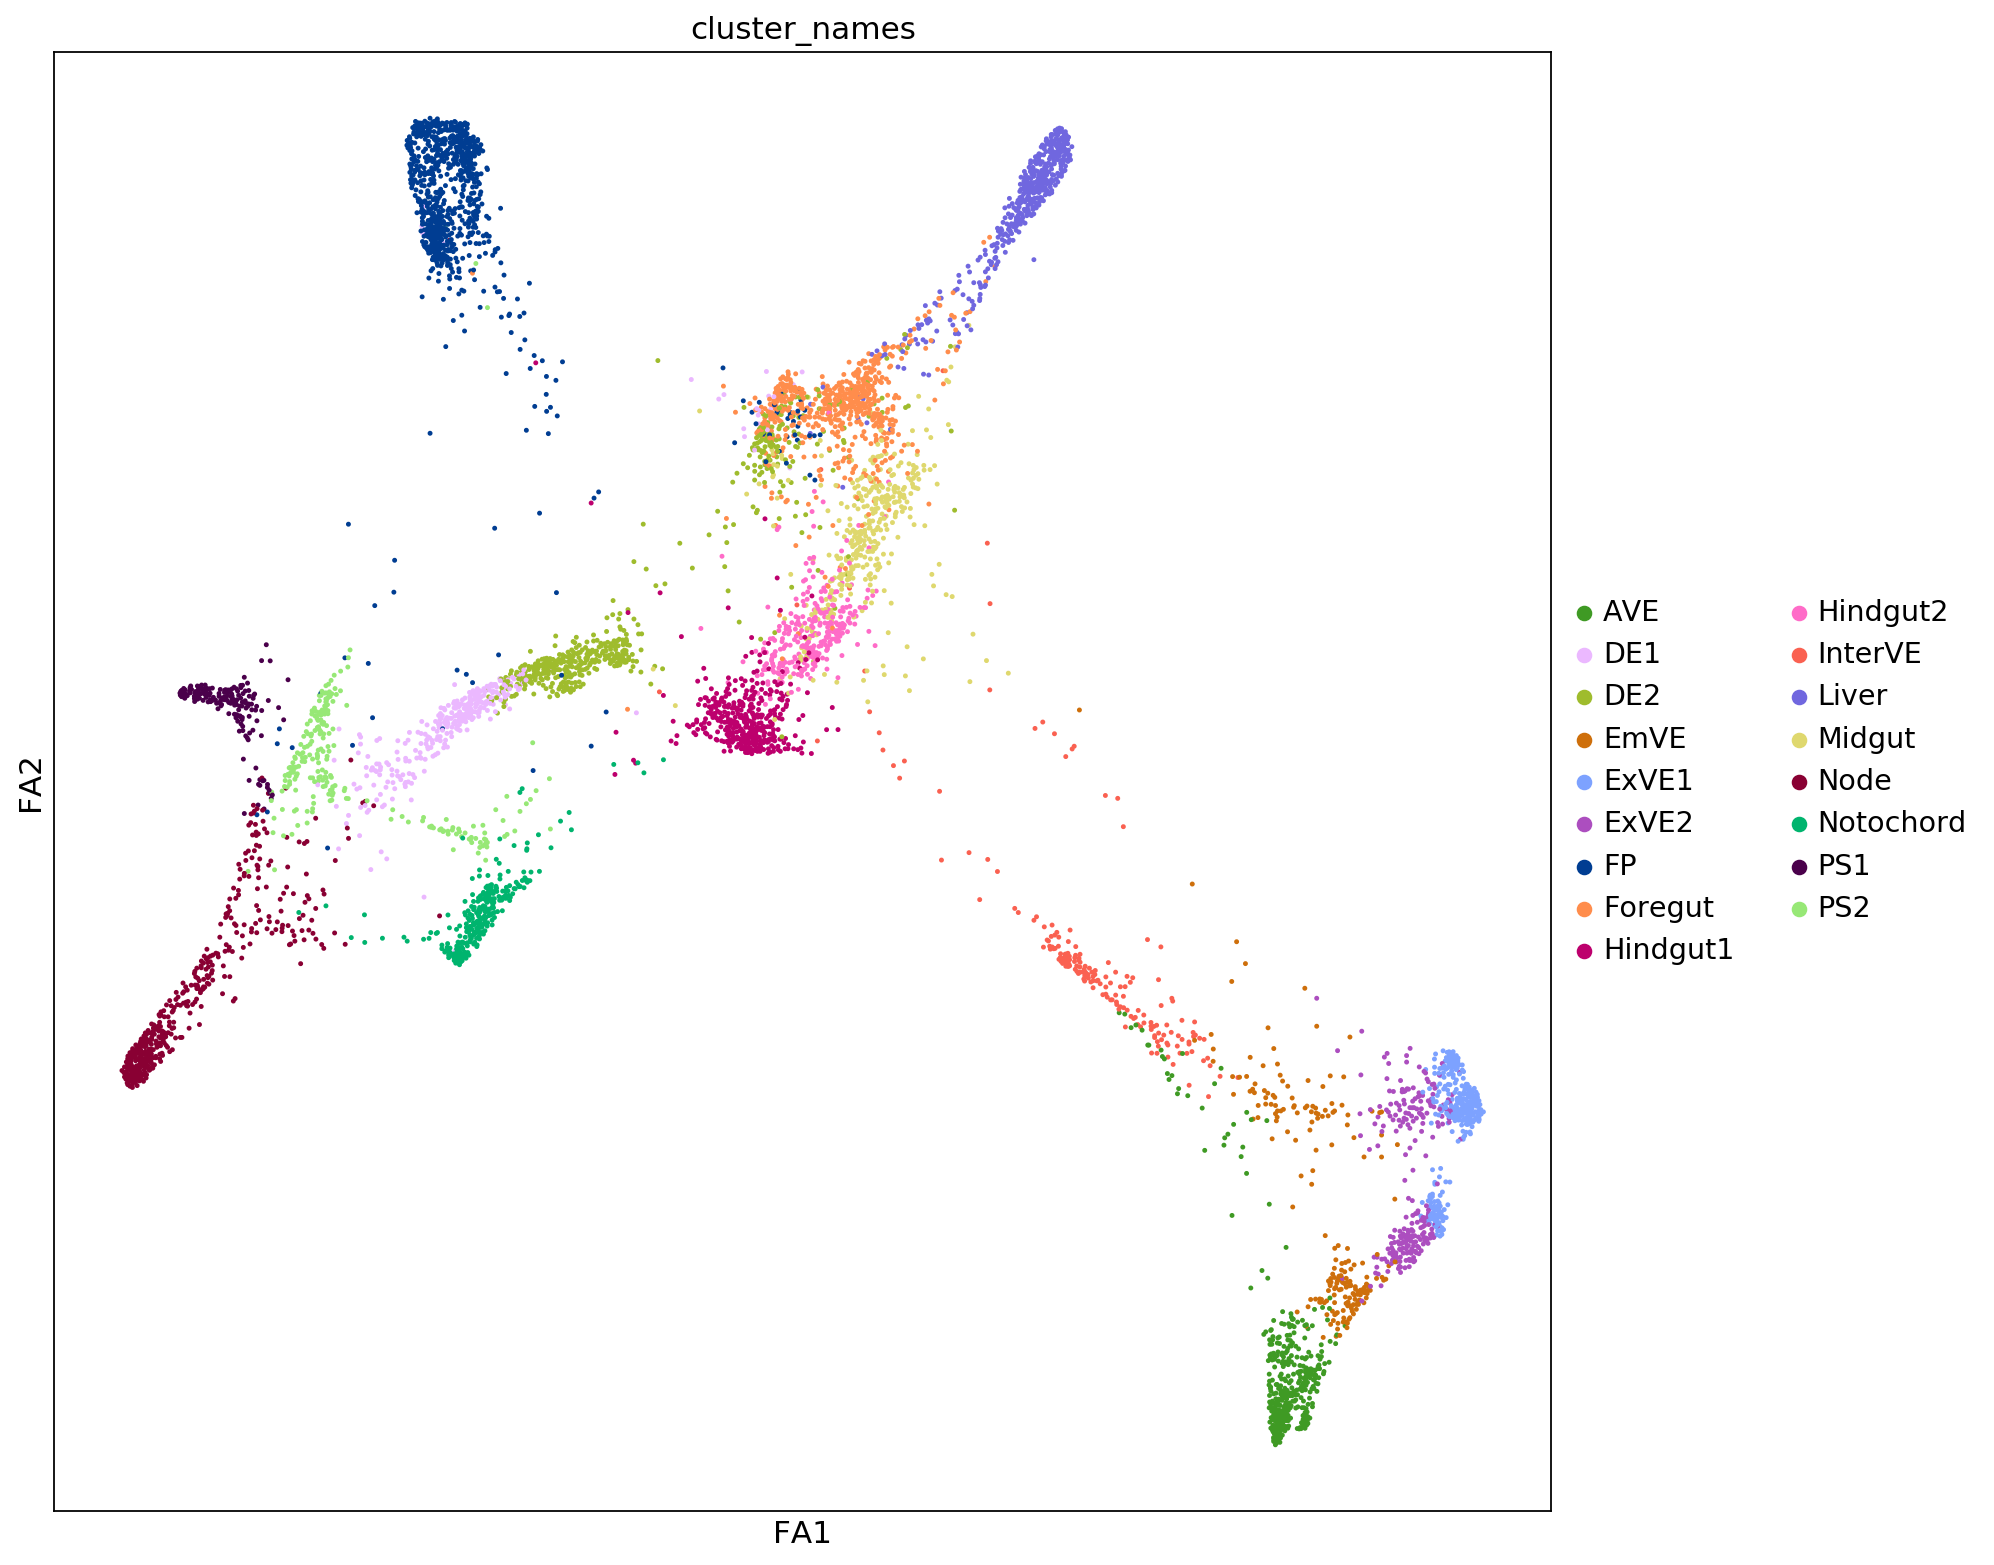

In [15]:
adata = run_paga(adata, by="cluster_names")

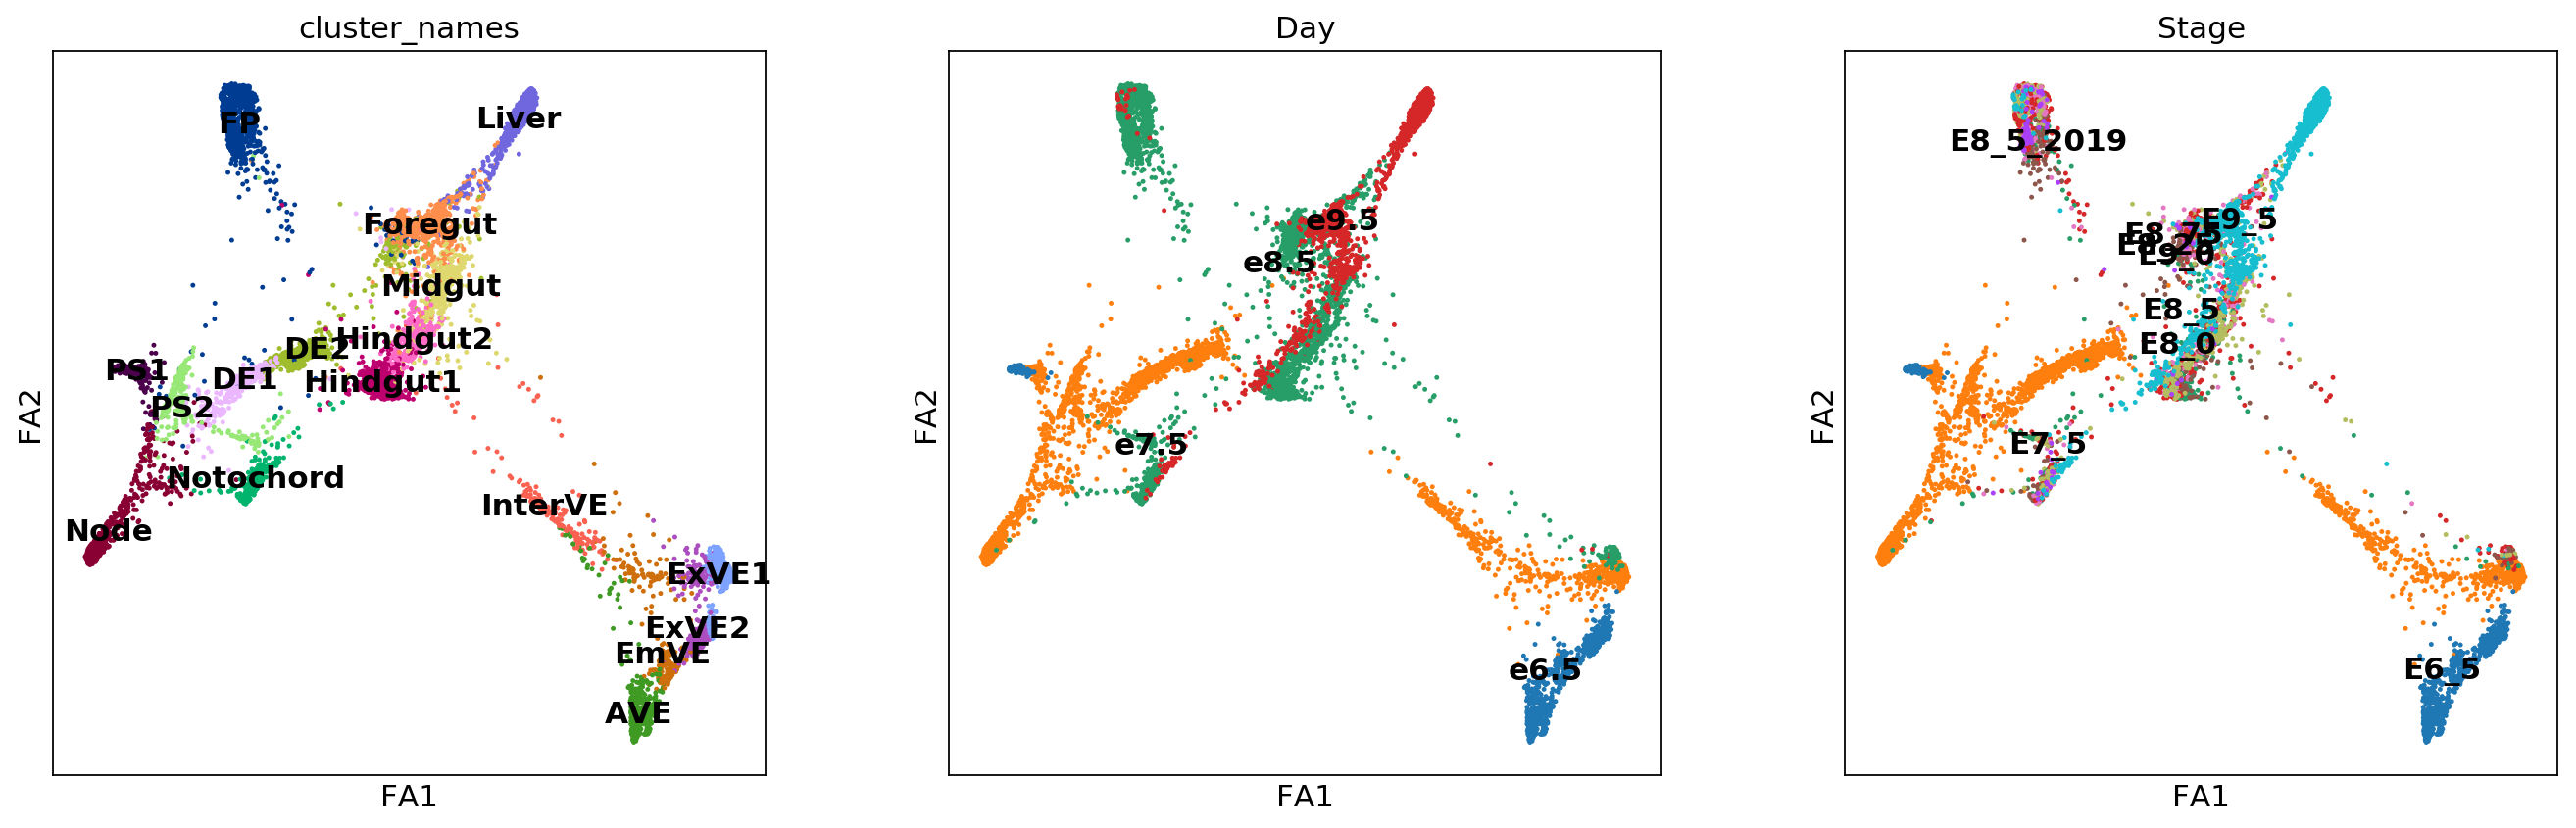

In [16]:
rcParams["figure.figsize"] = 6, 6
sc.pl.draw_graph(adata, color=["cluster_names", "Day", "Stage"], legend_loc="on data")

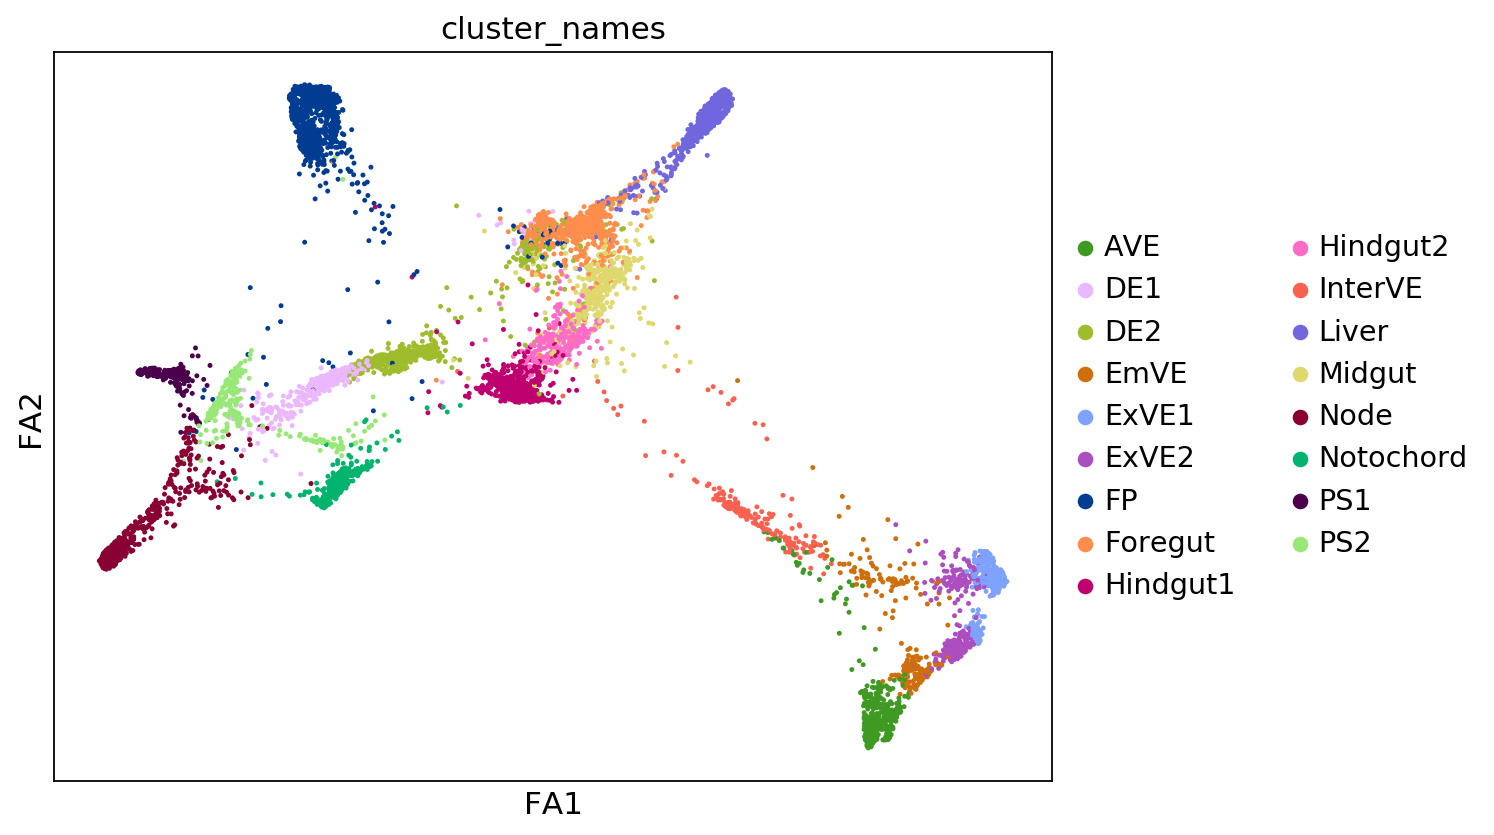

In [17]:
rcParams["figure.figsize"] = 8, 6
sc.pl.draw_graph(adata, color=["cluster_names"])

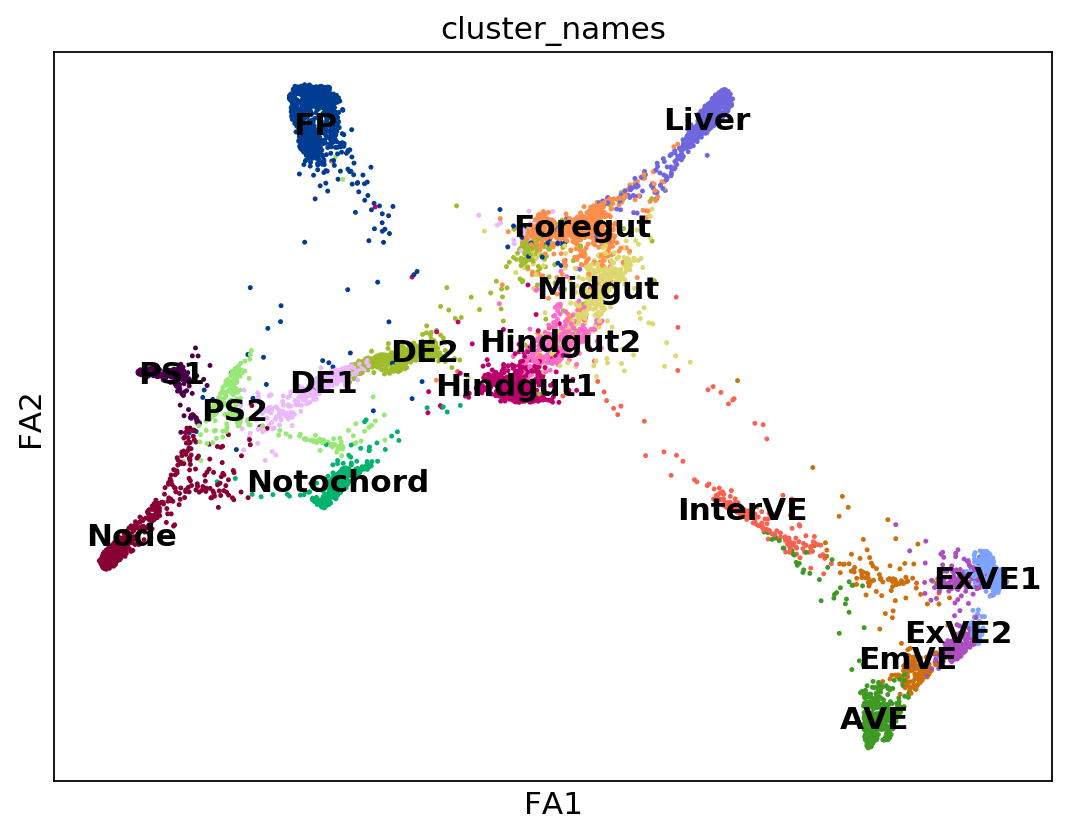

In [18]:
rcParams["figure.figsize"] = 8, 6
sc.pl.draw_graph(adata, color="cluster_names", legend_loc="on data", color_map="plasma")

--> added 'pos', the PAGA positions (adata.uns['paga'])


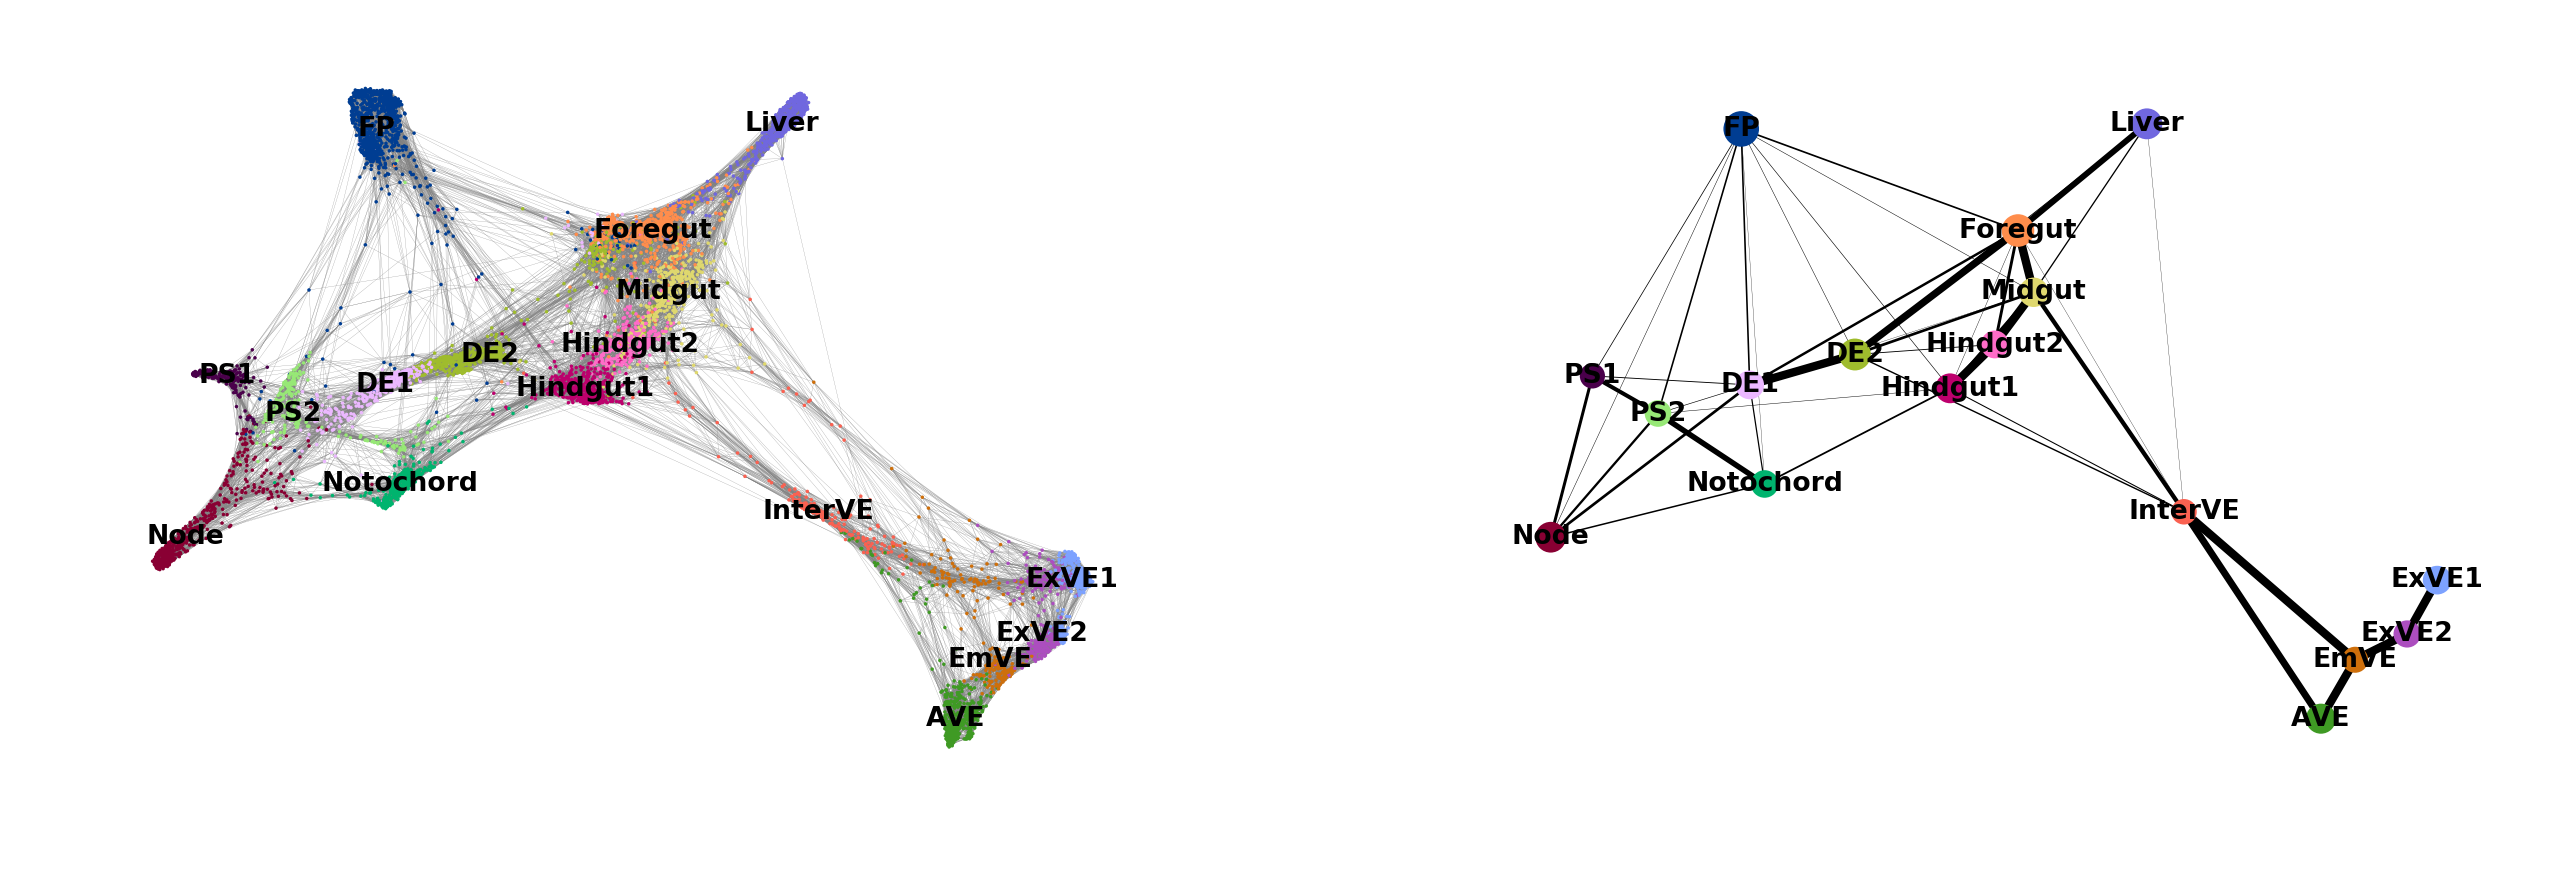

In [19]:
rcParams["figure.figsize"] = 8, 6
sc.pl.paga_compare(
    adata,
    color='cluster_names',
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    legend_fontsize=12,
    fontsize=12,
    frameon=False,
    edges=True,
)

--> added 'pos', the PAGA positions (adata.uns['paga'])


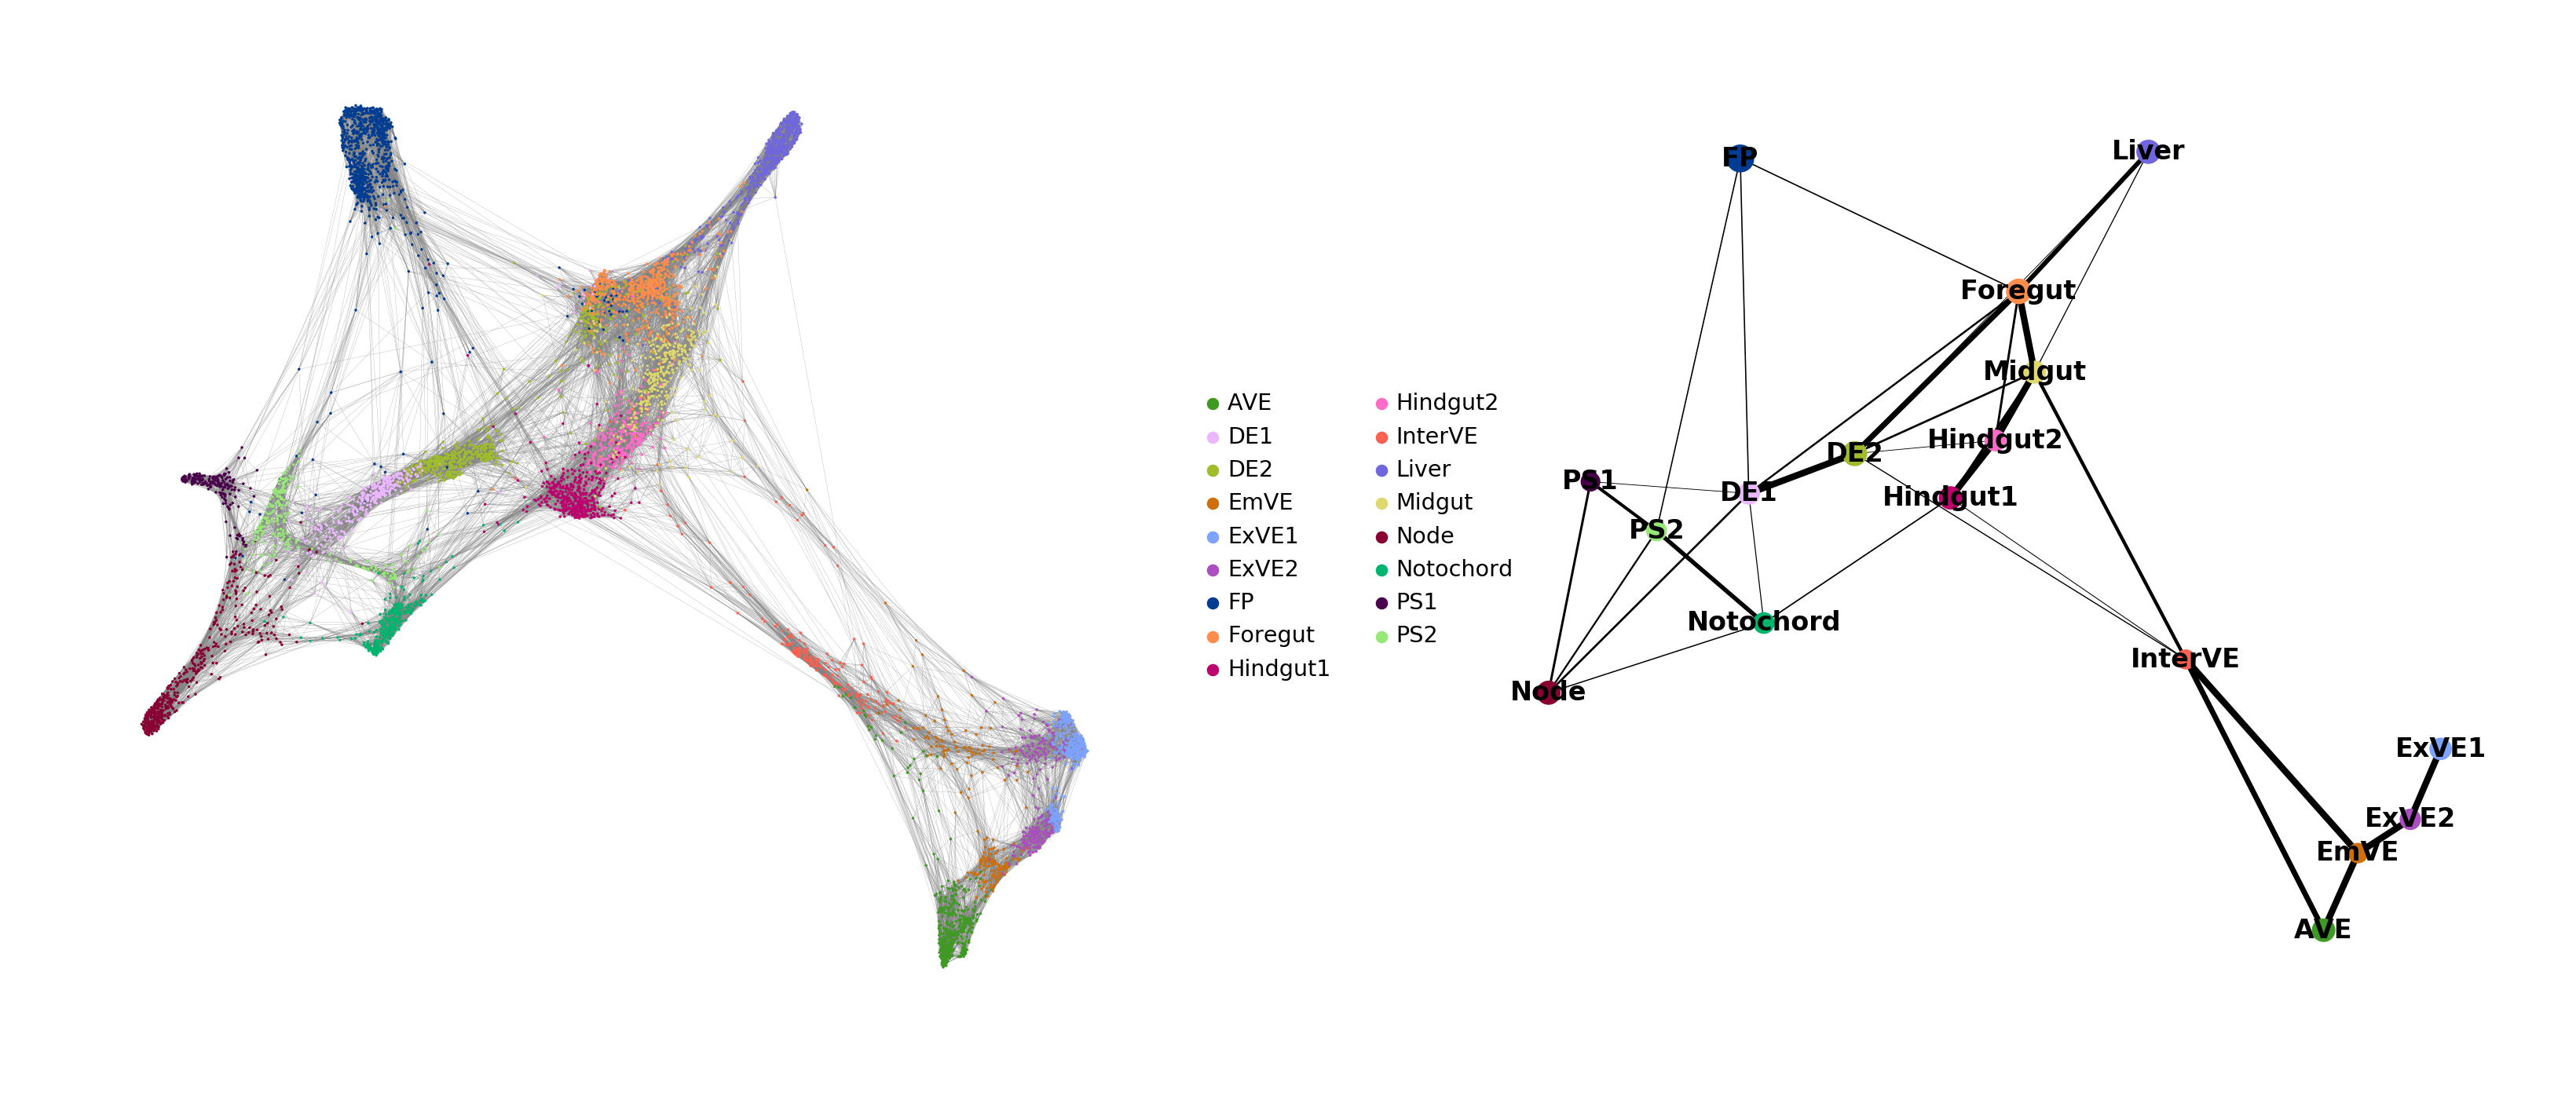

In [20]:
rcParams["figure.figsize"] = 10, 10
sc.pl.paga_compare(
    adata,
    color='cluster_names',
    threshold=0.1,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    fontsize=15,
    frameon=False,
    edges=True,
    legend_loc="right margin",
)

## Subset

In [21]:
adata_sub = adata[adata.obs.cluster_names.isin(['AVE', 'EmVE', 'ExVE1', 'ExVE2', 'Foregut', 'Hindgut1', 'Hindgut2', 'InterVE', 'Midgut', 'DE1', 'DE2'])]

running PAGA


Trying to set attribute `.uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


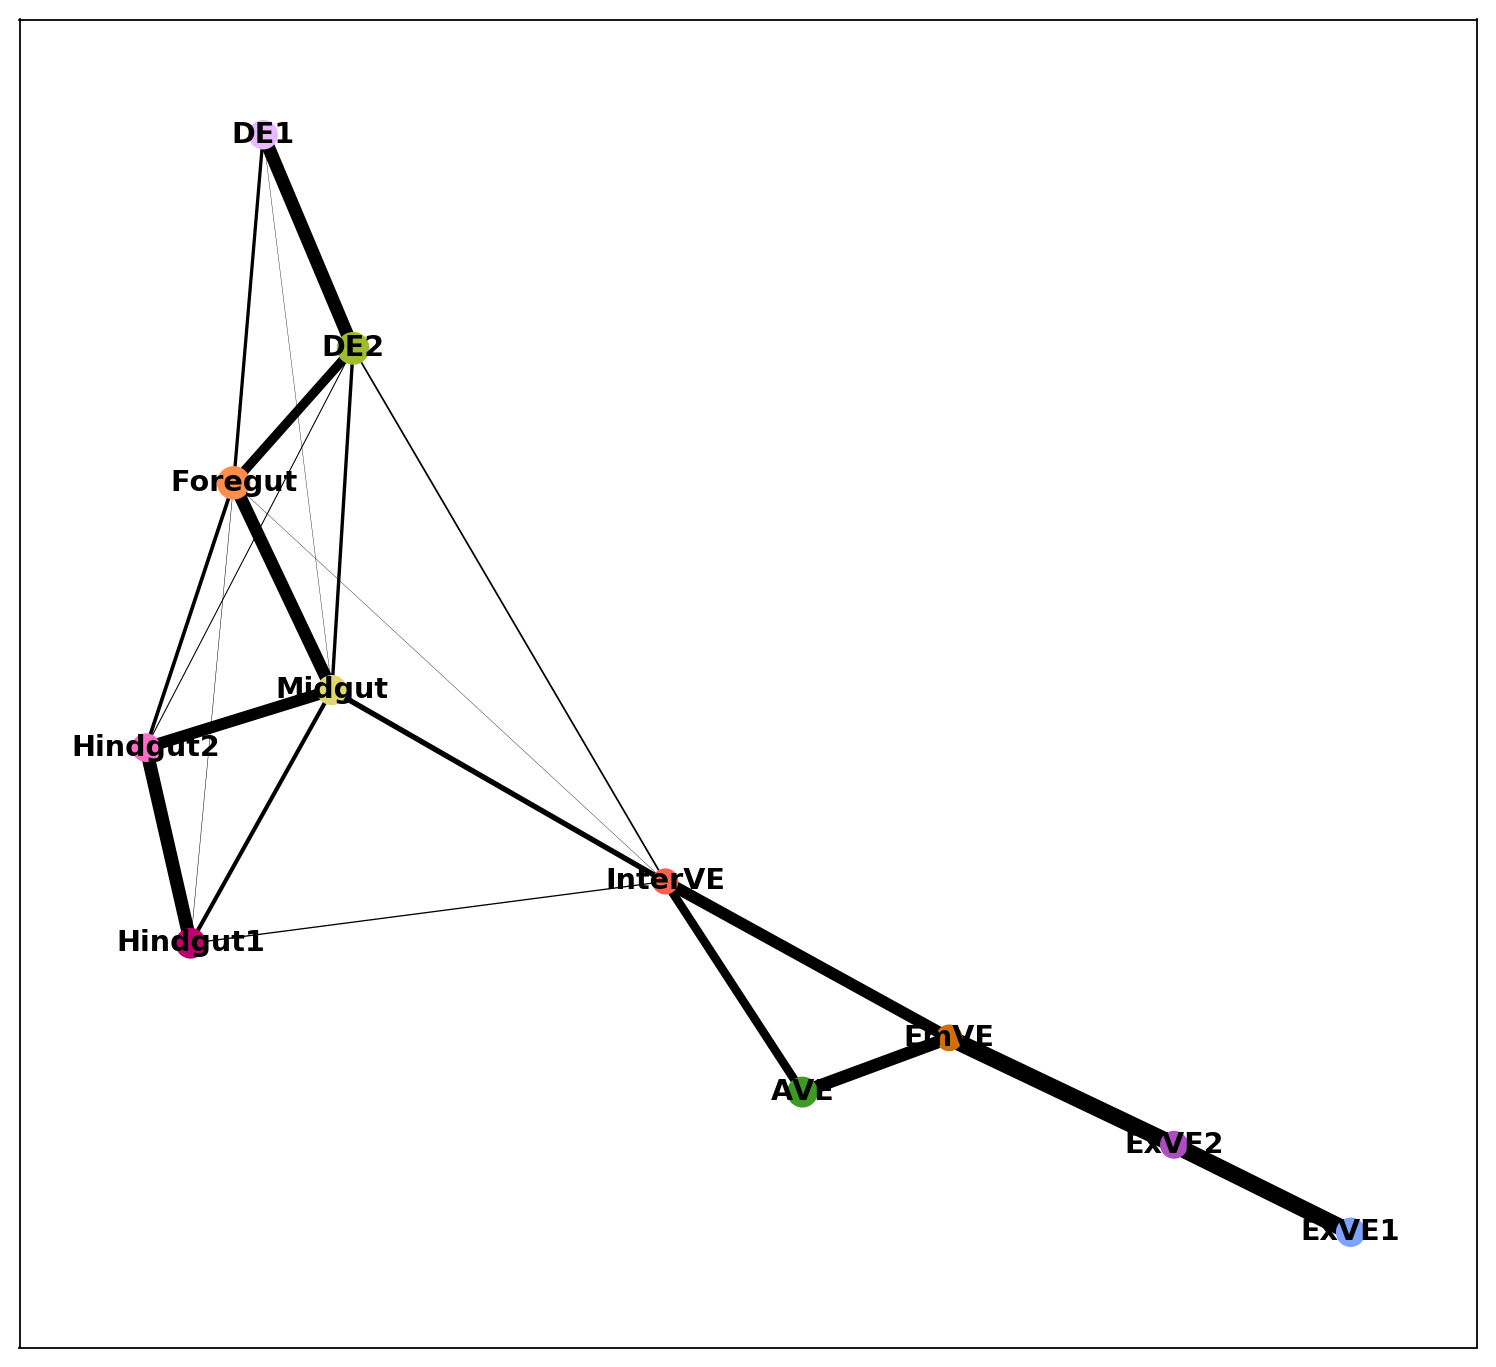

--> added 'pos', the PAGA positions (adata.uns['paga'])
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:31)


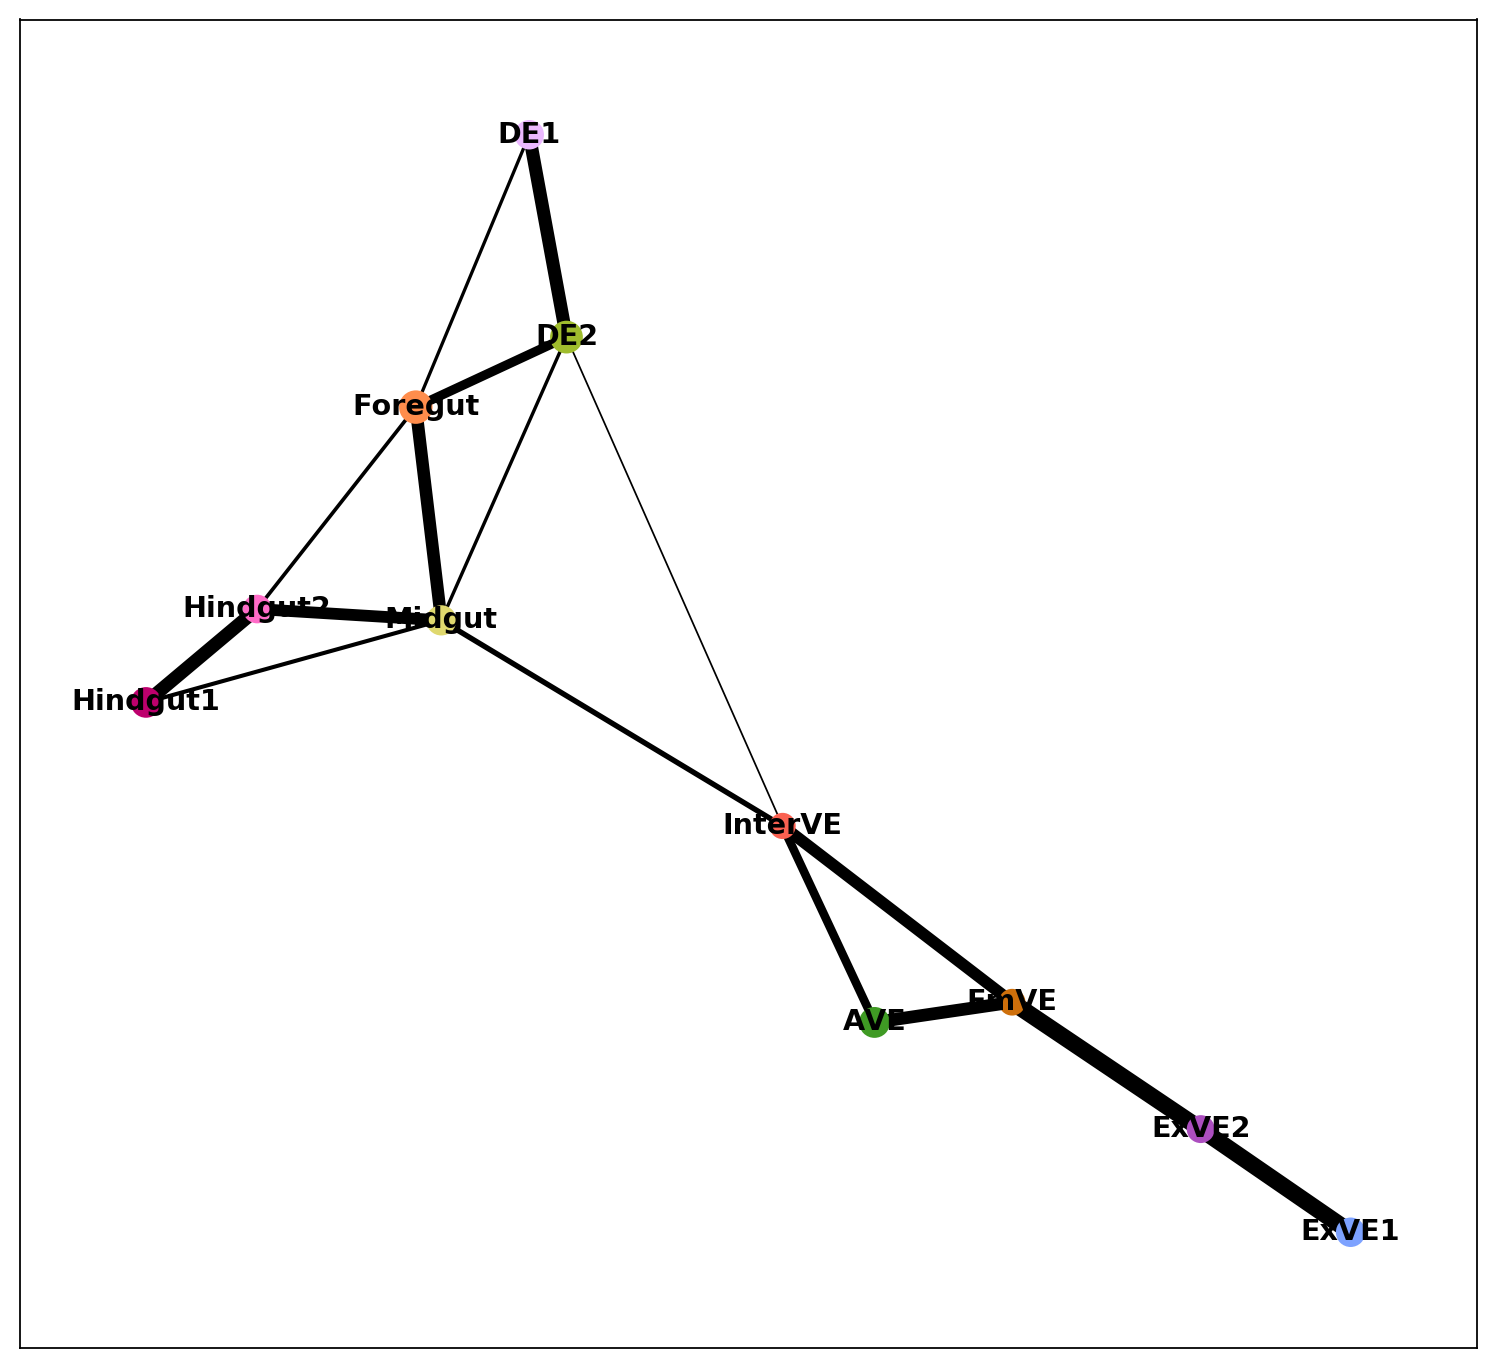

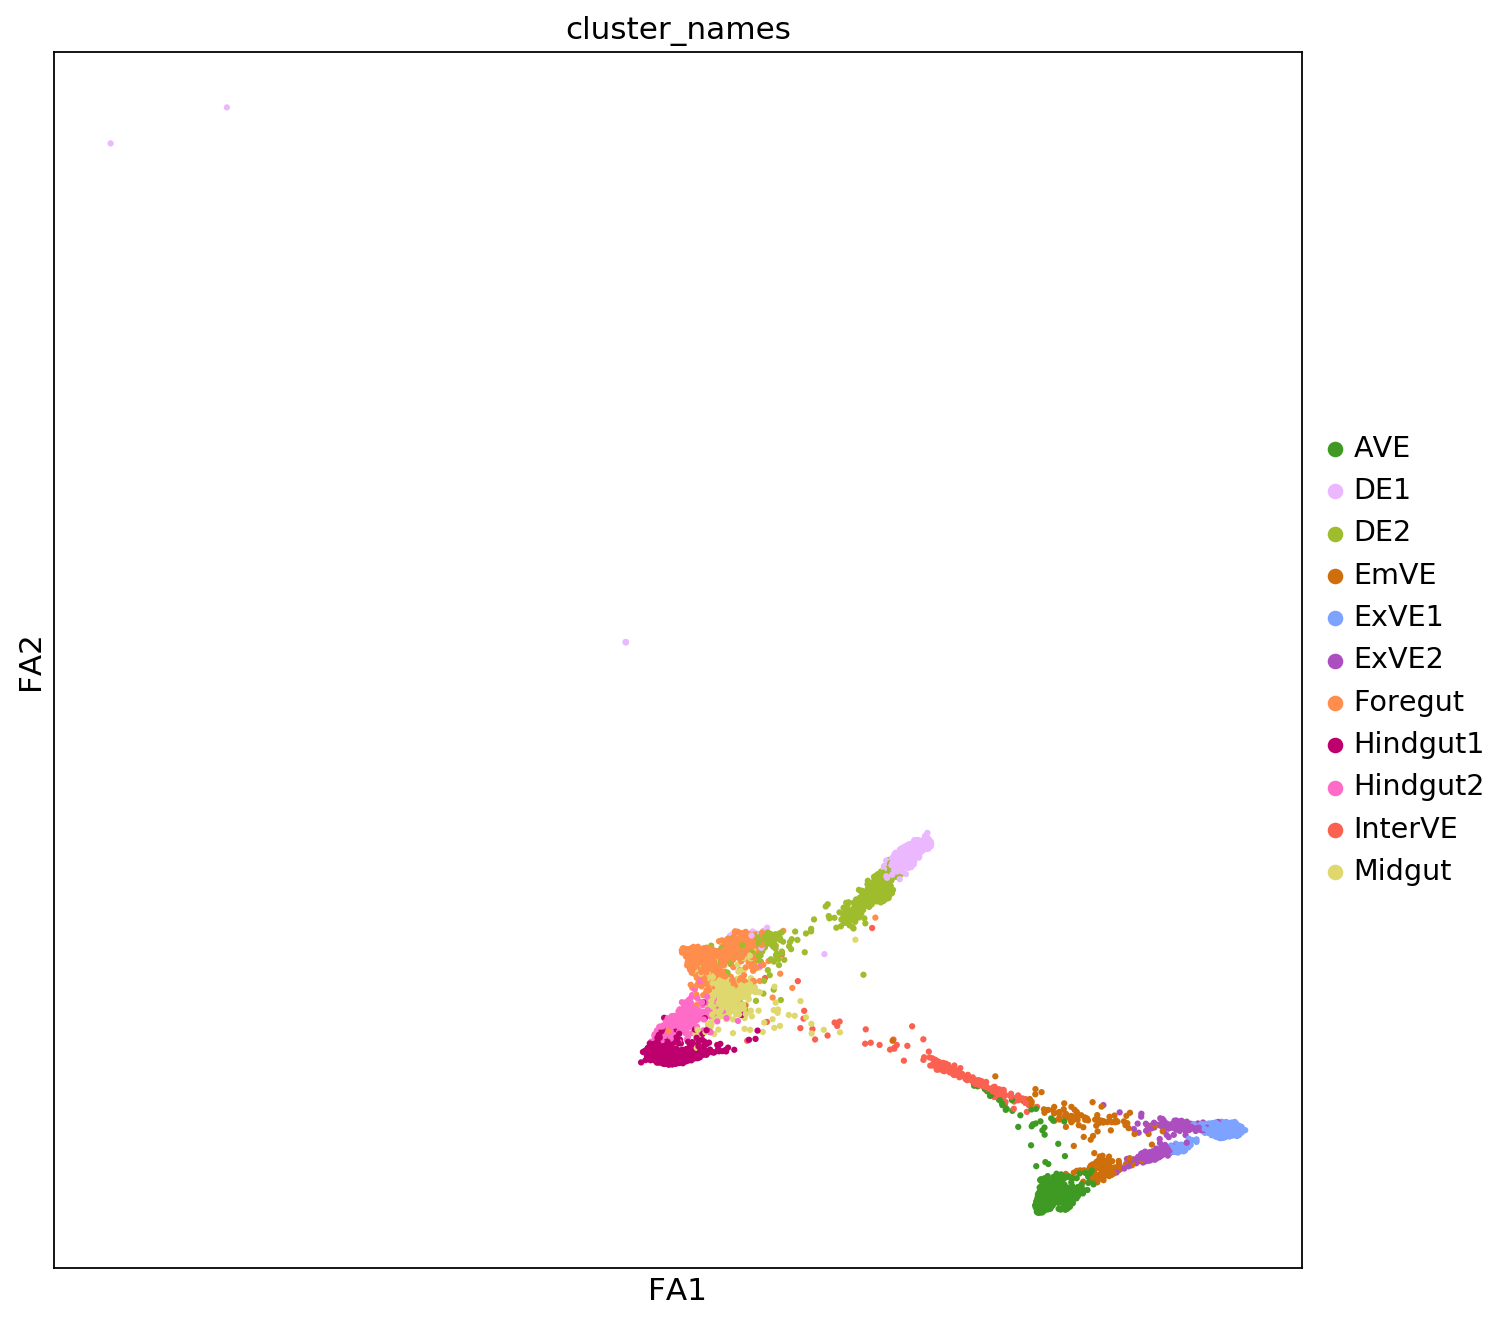

In [22]:
adata_sub = run_paga(adata_sub, by="cluster_names")

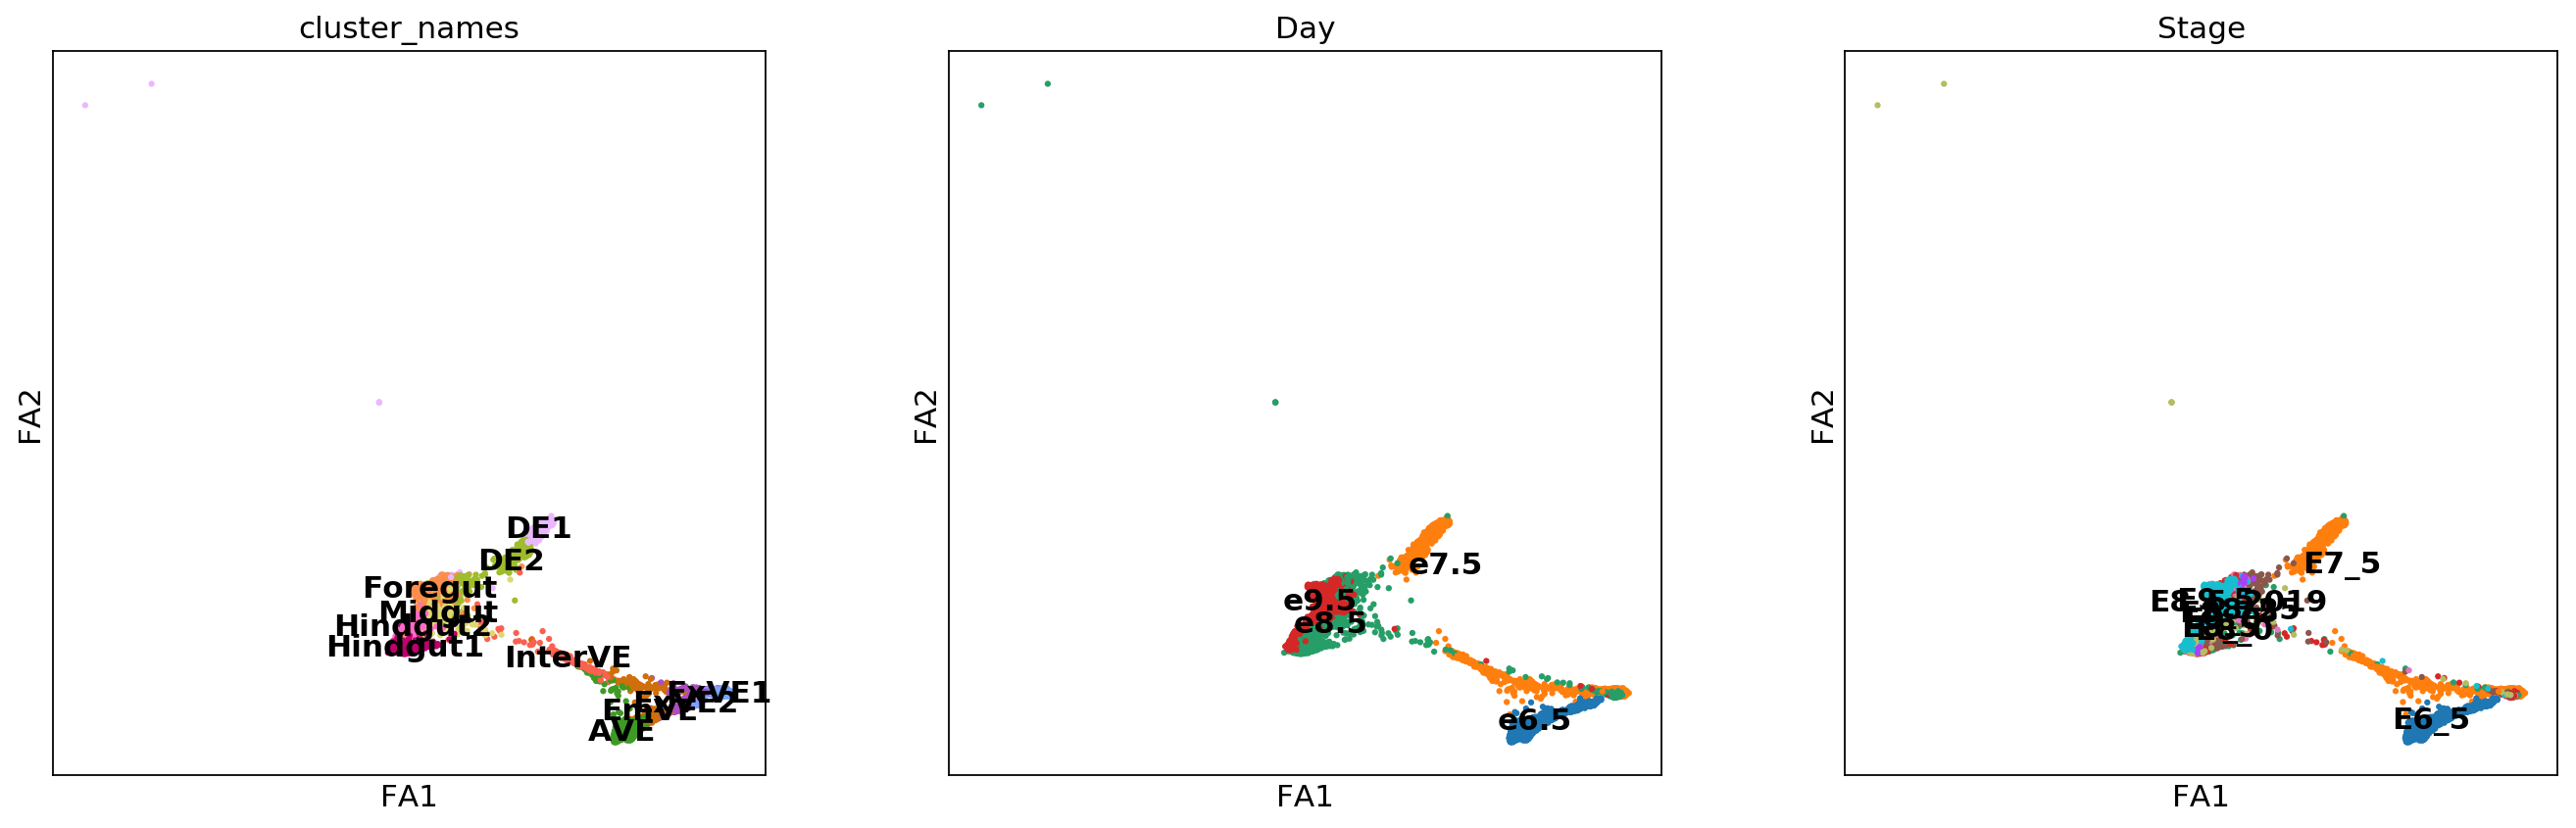

In [23]:
rcParams["figure.figsize"] = 6, 6
sc.pl.draw_graph(adata_sub, color=["cluster_names", "Day", "Stage"], legend_loc="on data")

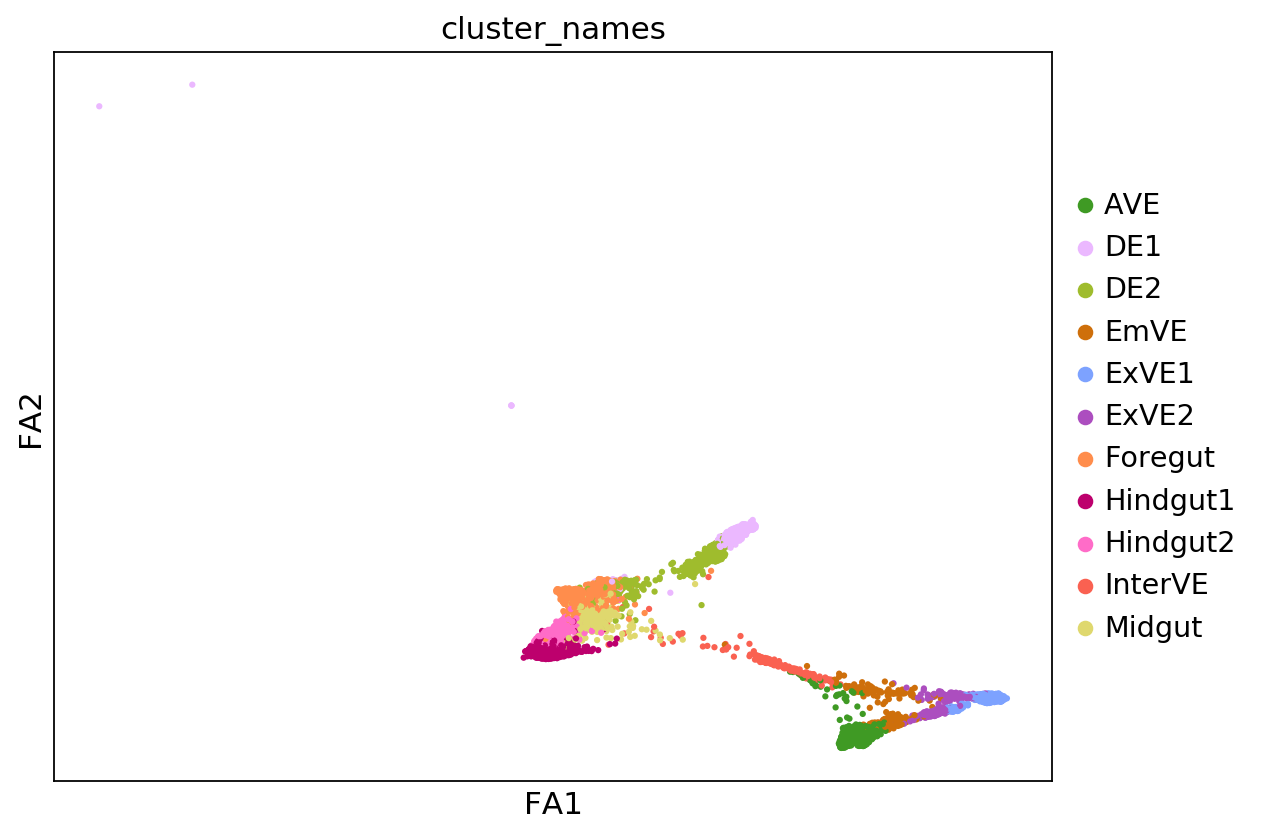

In [24]:
rcParams["figure.figsize"] = 8, 6
sc.pl.draw_graph(adata_sub, color=["cluster_names"])

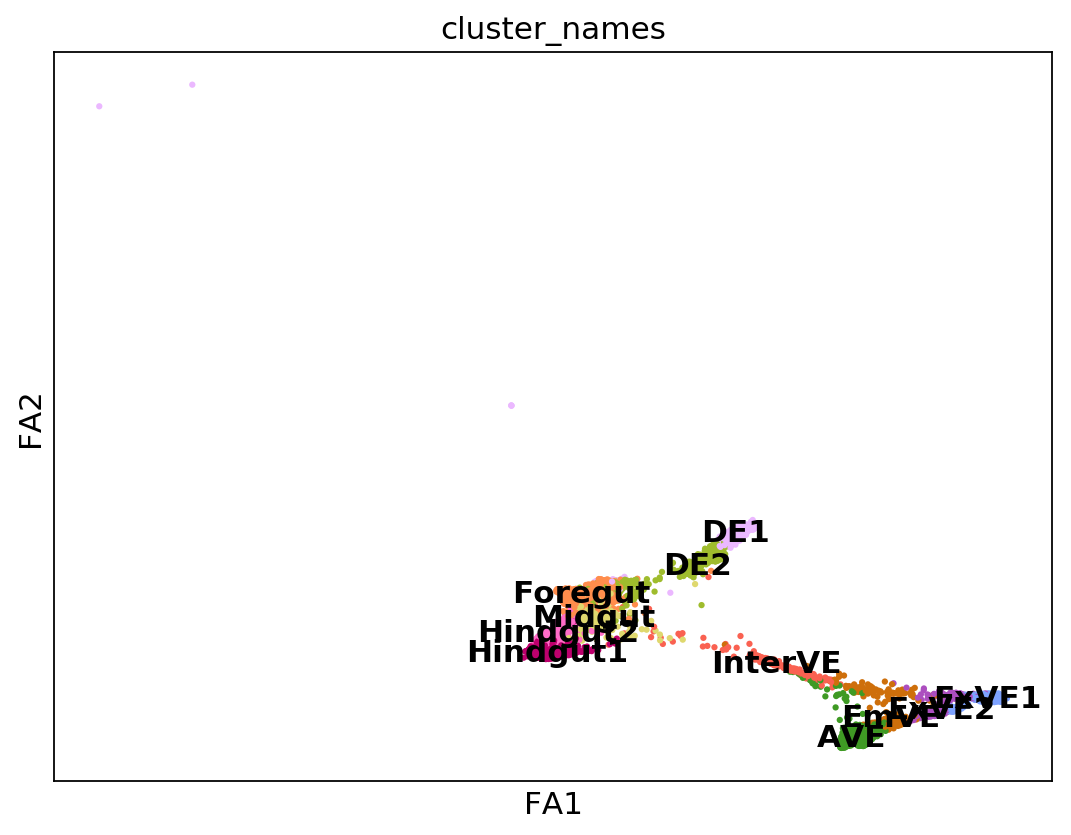

In [25]:
rcParams["figure.figsize"] = 8, 6
sc.pl.draw_graph(adata_sub, color="cluster_names", legend_loc="on data", color_map="plasma")

--> added 'pos', the PAGA positions (adata.uns['paga'])


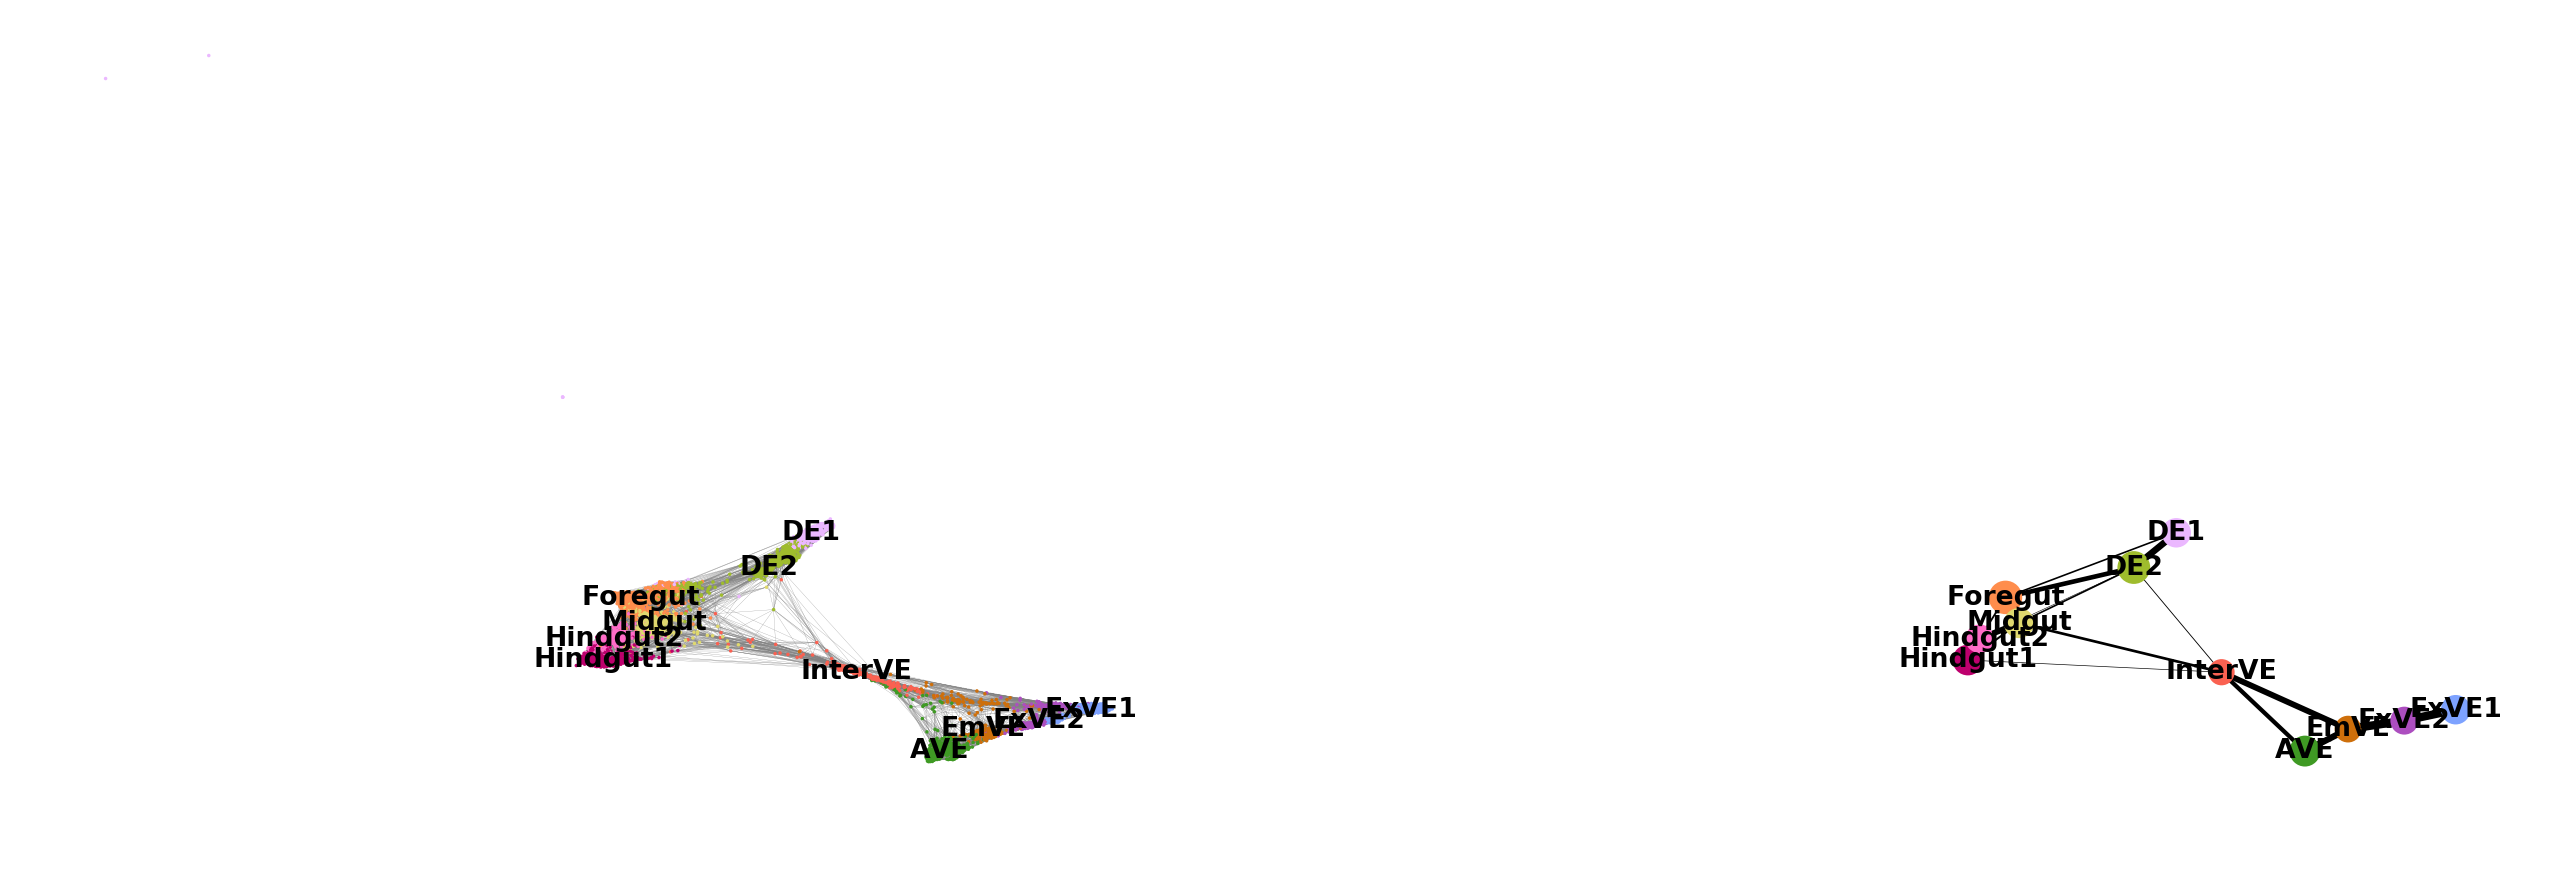

In [26]:
rcParams["figure.figsize"] = 8, 6
sc.pl.paga_compare(
    adata_sub,
    color='cluster_names',
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    legend_fontsize=12,
    fontsize=12,
    frameon=False,
    edges=True,
)

--> added 'pos', the PAGA positions (adata.uns['paga'])


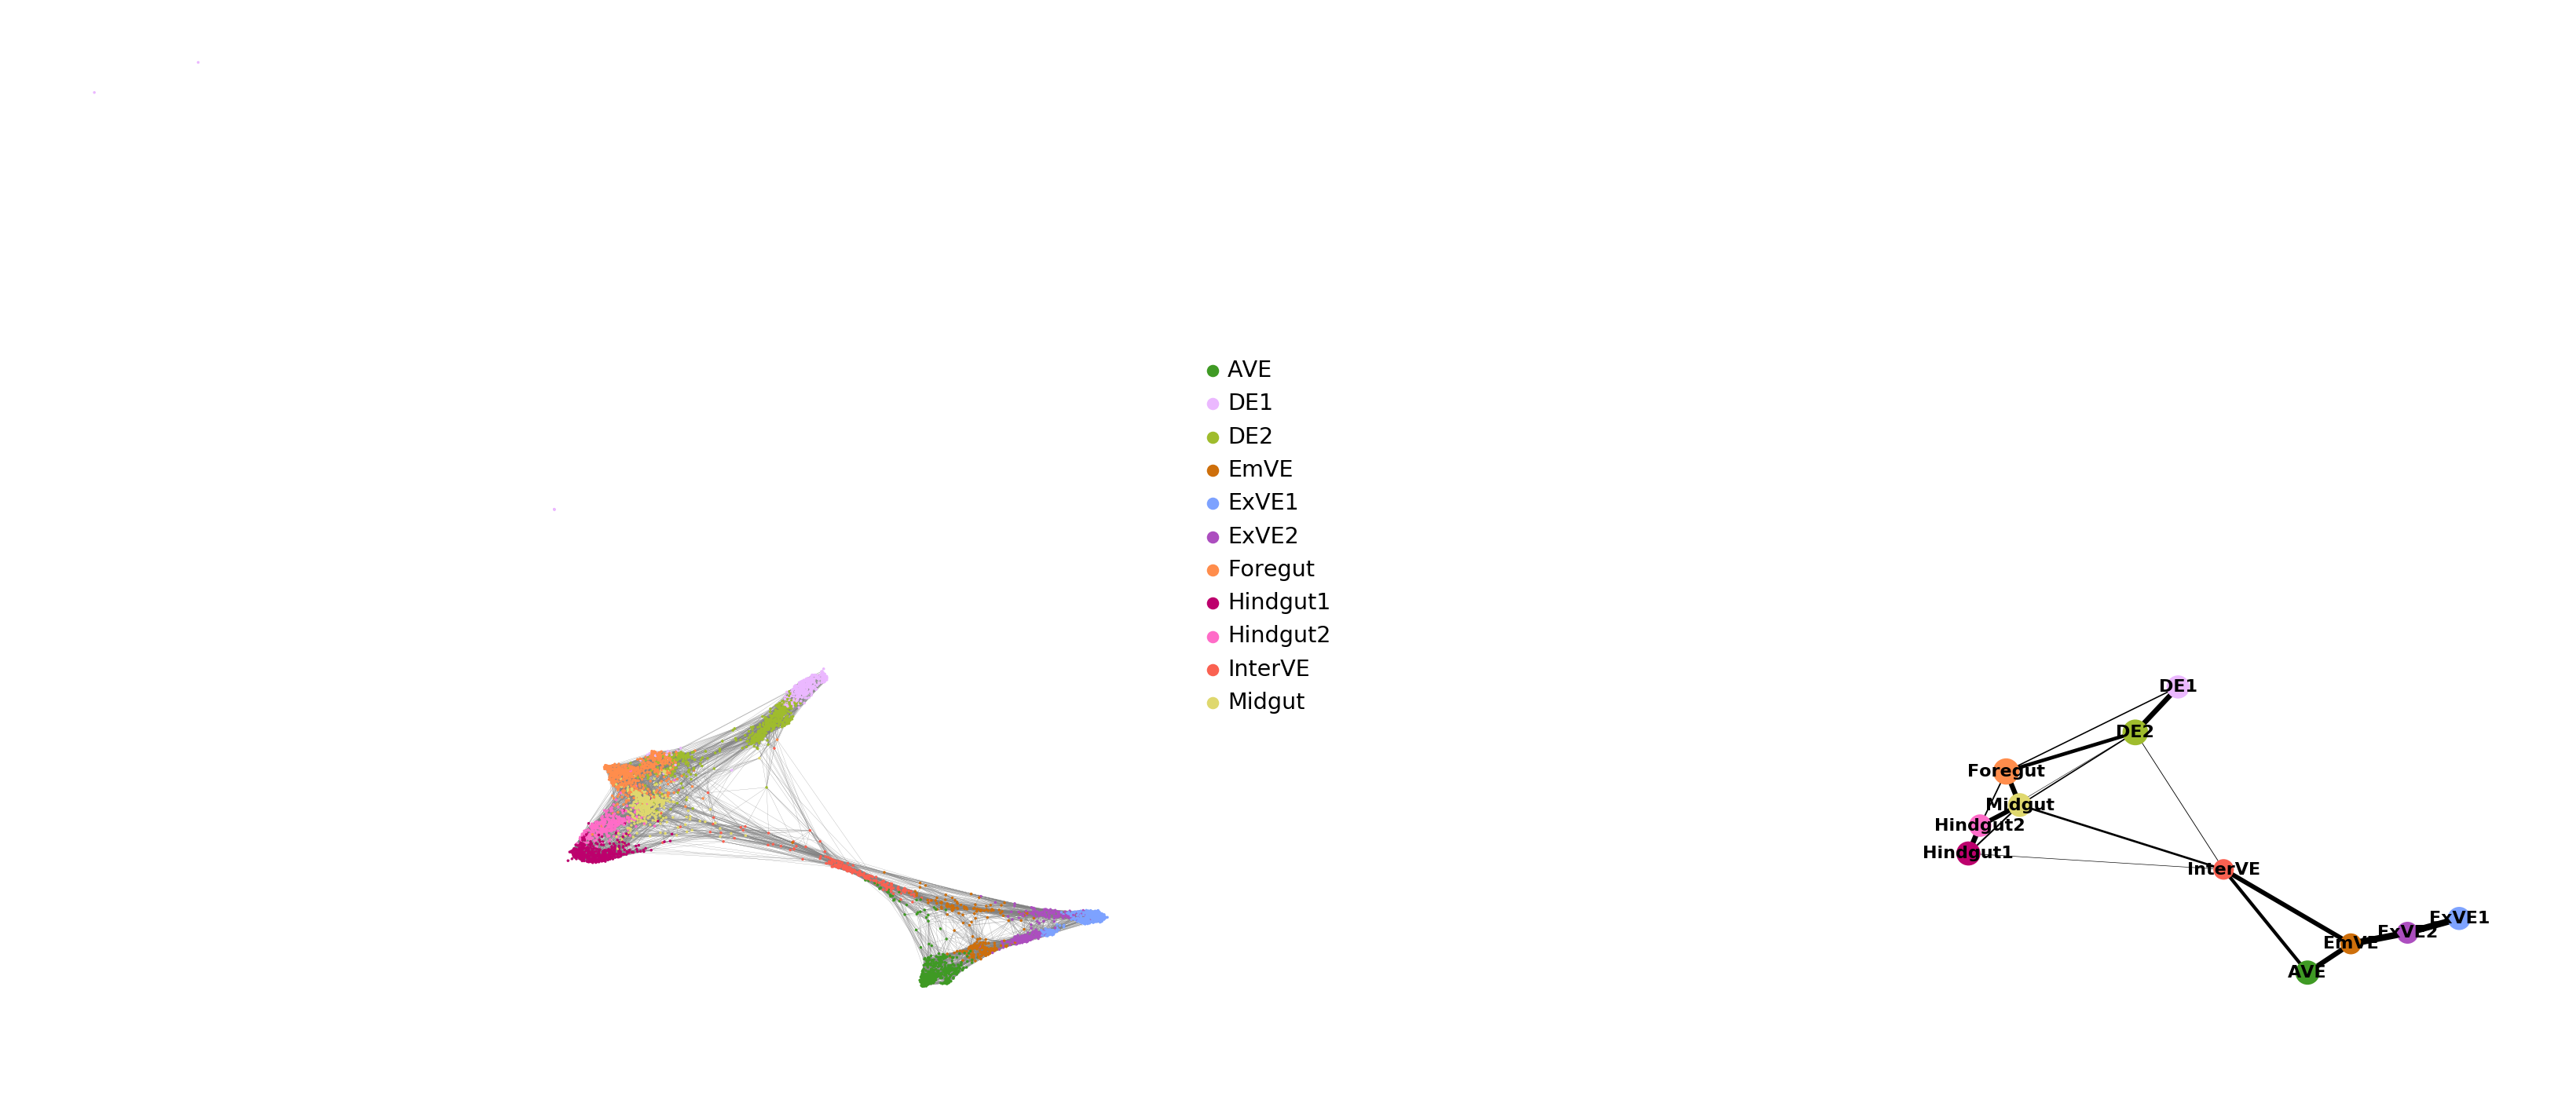

In [28]:
rcParams["figure.figsize"] = 10, 10
sc.pl.paga_compare(
    adata_sub,
    color='cluster_names',
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    fontsize=10,
    frameon=False,
    edges=True,
    legend_loc="right margin"
)

In [29]:
!jupyter nbconvert --to html 02_vivo_paga.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 02_vivo_paga.ipynb to html
[NbConvertApp] Writing 6558534 bytes to ../reports/02_vivo_paga.html
